In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from functools import partial

In [7]:
# READ DATA

data_path = 'household_power_consumption.txt'

data = pd.read_csv(data_path, sep=';',parse_dates={'data': ['Date', 'Time']},
                   infer_datetime_format=True,
                   na_values=['nan', '?'],
                   index_col='data')

In [8]:
data_head = data.head()
data_head

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
data_tail = data.tail()
data_tail

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [10]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [12]:
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [13]:
data_clear = data.dropna()

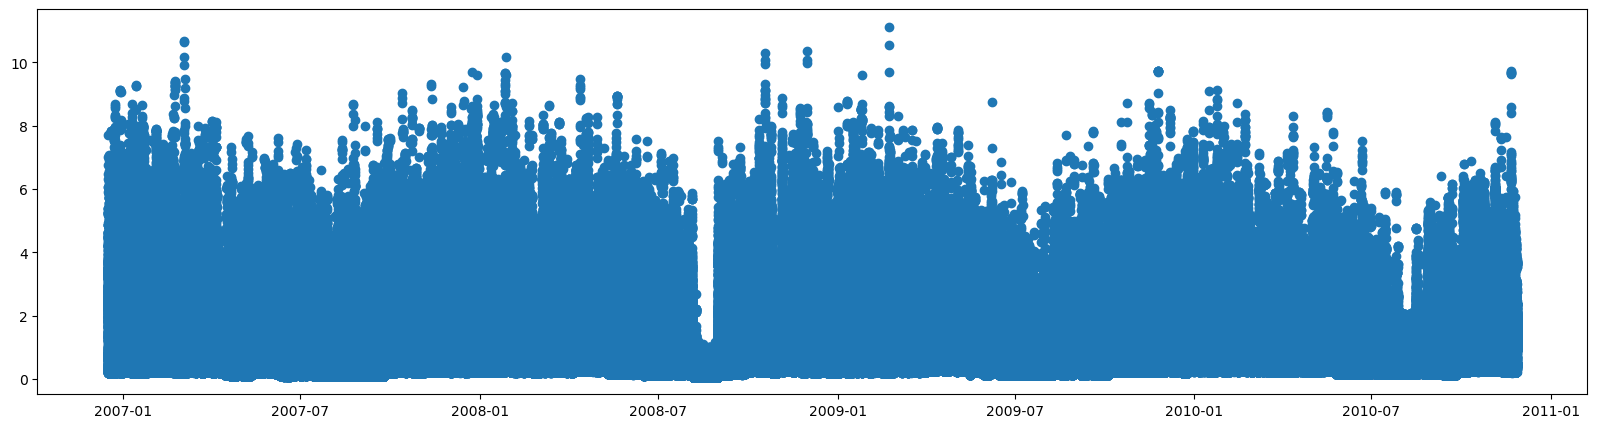

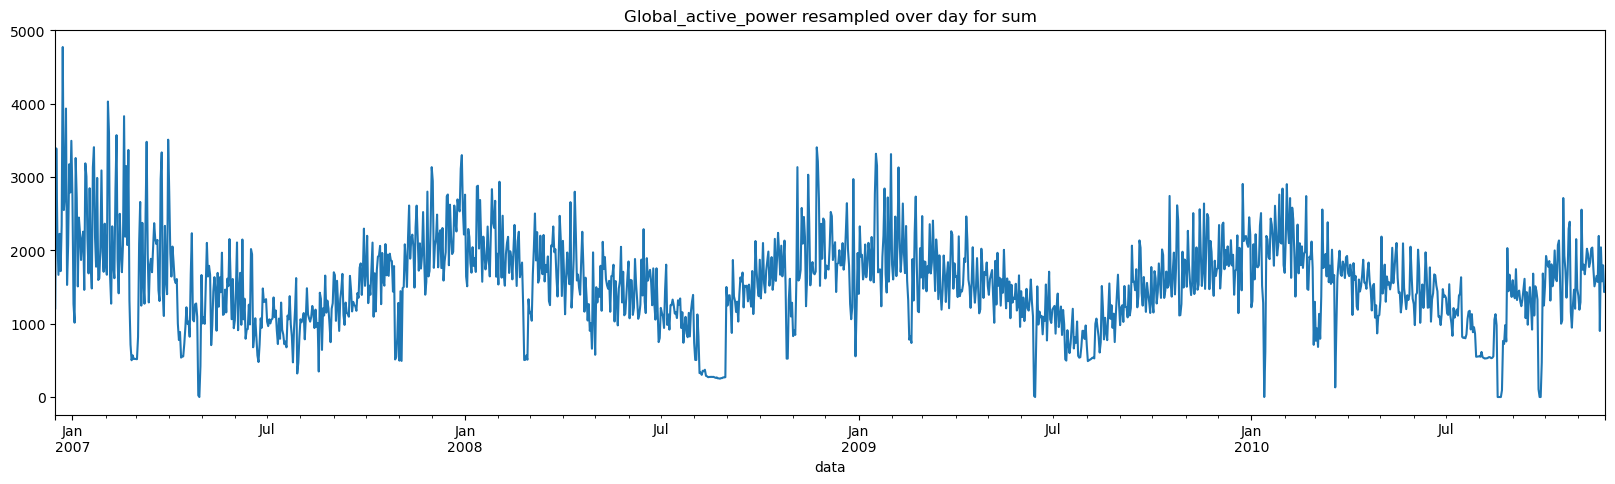

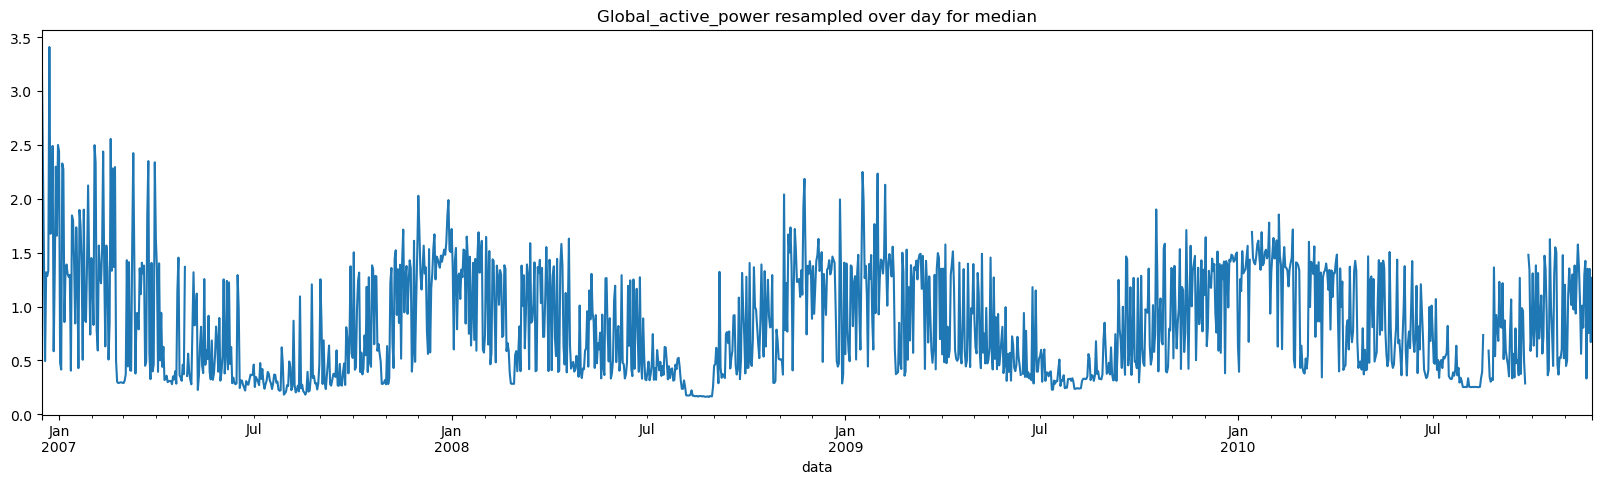

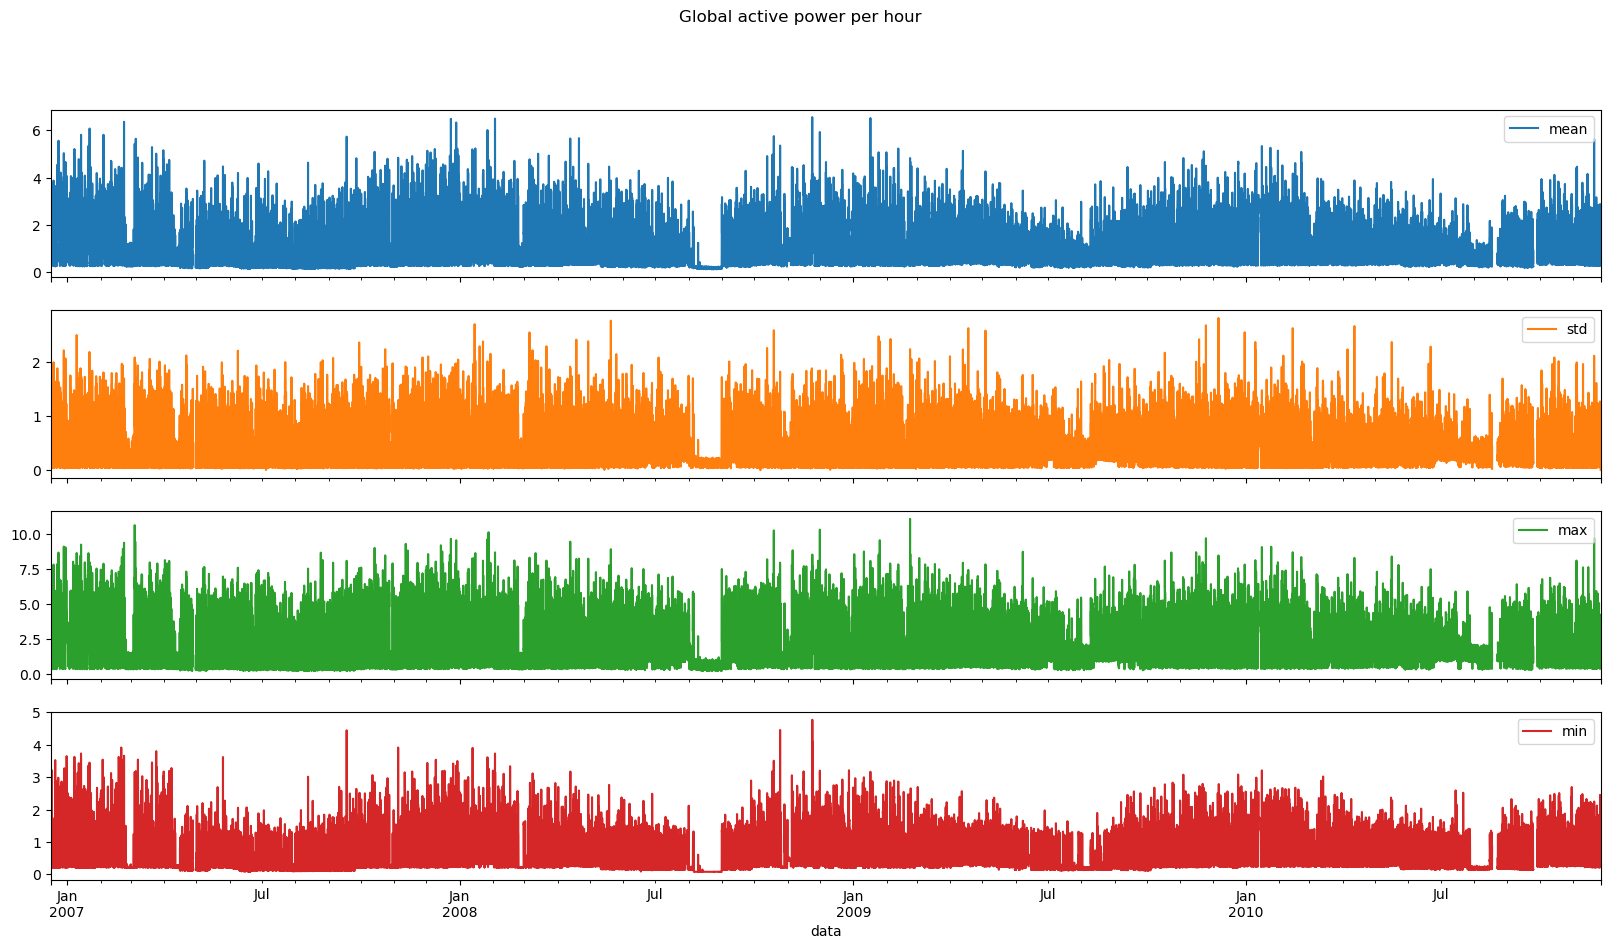

In [14]:
# VISUALIZATION

# Scatter plot of Global_active_power
plt.figure(figsize=(20, 5))
plt.scatter(data_clear.index, data_clear['Global_active_power'])
plt.show()

# Global_active_power resampled over day for sum
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')
plt.show()

# Global_active_power resampled over day for mean
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').median().plot(title='Global_active_power resampled over day for median')
plt.show()

# Global active power per hour
h = data_clear.Global_active_power.resample('h').agg(['mean', 'std', 'max', 'min'])
h.plot(subplots=True, figsize=(20, 10), title='Global active power per hour')
plt.show()

In [15]:
 # DATA PREPARATION

# Resampling of data over 30 minutes
data_resample = data_clear.resample('30Min').mean()
data_resample.shape

# Splitting into target variable and feathers
X = data_resample.drop("Global_active_power", axis=1)
X = X.reset_index(drop=True)
X.head()

y = data_resample["Global_active_power"].reset_index(drop=True)
y.head()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Control missing values
X_train.isna().sum()

X_test.isna().sum()

y_train.isna().sum()
y_test.isna().sum()

# Drop missing values
X_train = X_train.dropna()

X_test = X_test.dropna()

y_train = y_train.dropna()

y_test = y_test.dropna()


(48423, 6)
(20754, 6)
(48423,)
(20754,)


In [16]:
# NORMALIZE DATA

# scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize X_train
X_train_norm = scaler.fit_transform(X_train)
print(X_train.shape)

# Normalize X_test
X_test_norm = scaler.fit_transform(X_test)
print(X_test.shape)

(47840, 6)
(20484, 6)


In [17]:
# Evaluation and visualization of model parameters


def learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(20, 8))
    plt.grid(True)
    plt.title('Learning curves')
    plt.gca().set_ylim(0, 1)
    plt.show()
def evaluation_model(history):
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
    axL.plot(history.history['loss'], label="loss (mse) for training")
    axL.plot(history.history['val_loss'], label="loss (mse) for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

    axR.plot(history.history['mae'], label="mae for training")
    axR.plot(history.history['val_mae'], label="mae for validation")
    axR.set_title('model mae')
    axR.set_xlabel('epoch')
    axR.set_ylabel('mae')
    axR.legend(loc='upper right')

    plt.show()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/10


299/299 - 2s - loss: 0.9021 - mae: 0.7631 - val_loss: 0.8883 - val_mae: 0.7547 - 2s/epoch - 8ms/step
Epoch 2/10
299/299 - 

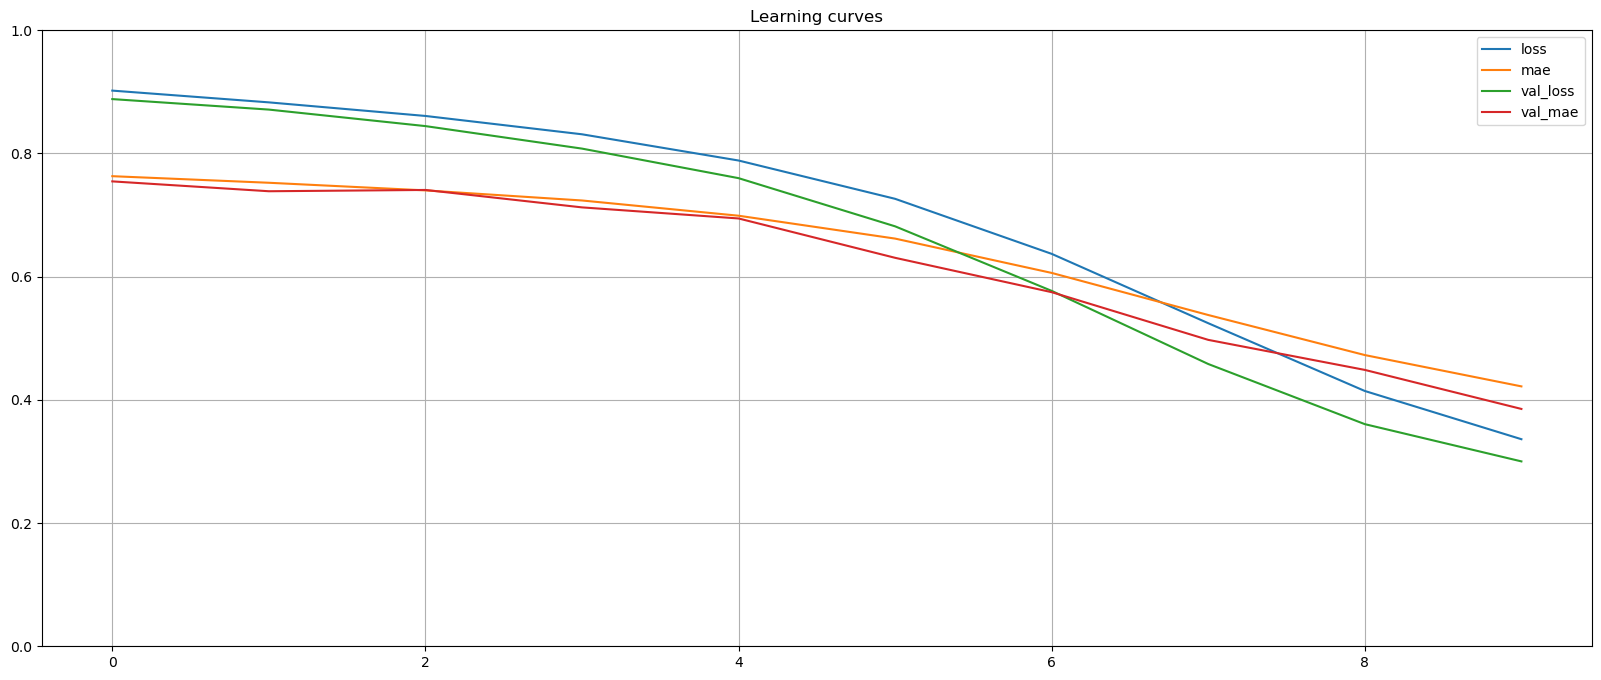

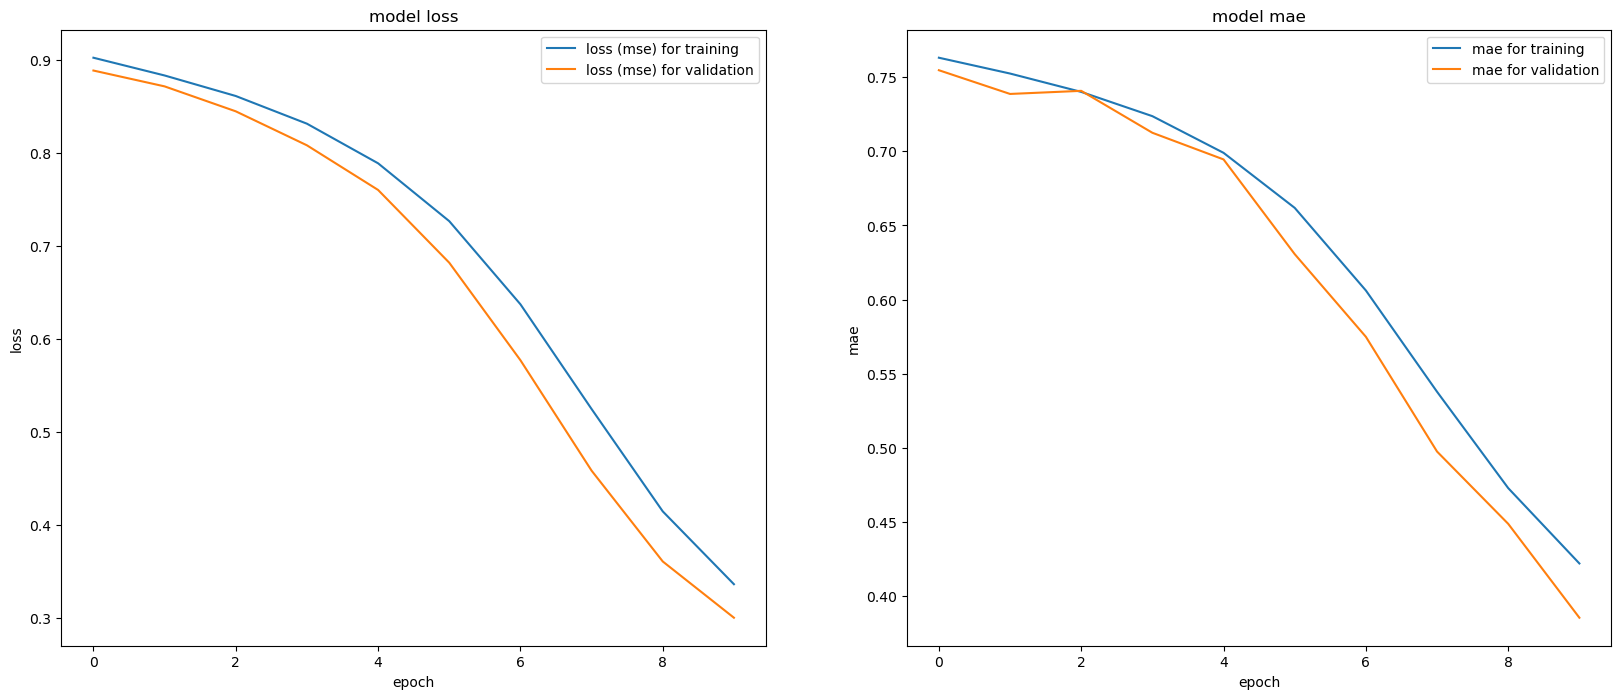

In [18]:
# Basic model with three fully connected layers

model_1a = Sequential([
    Dense(64, activation='sigmoid', input_shape=(6,)),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1a.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1a.summary()
tf.keras.utils.plot_model(model_1a, to_file='model_1a.png')

history_1a = model_1a.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.2)
# Learning curves
learning_curves(history_1a)

# Evaluation model
evaluation_model(history_1a)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/10
225/225 - 1s - loss: 0.9077 - mae: 0.7586 - val_loss: 0.8830 - val_mae: 0.7583 - 1s/epoch - 7ms/step
Epoch 2/10
225/225 - 1s

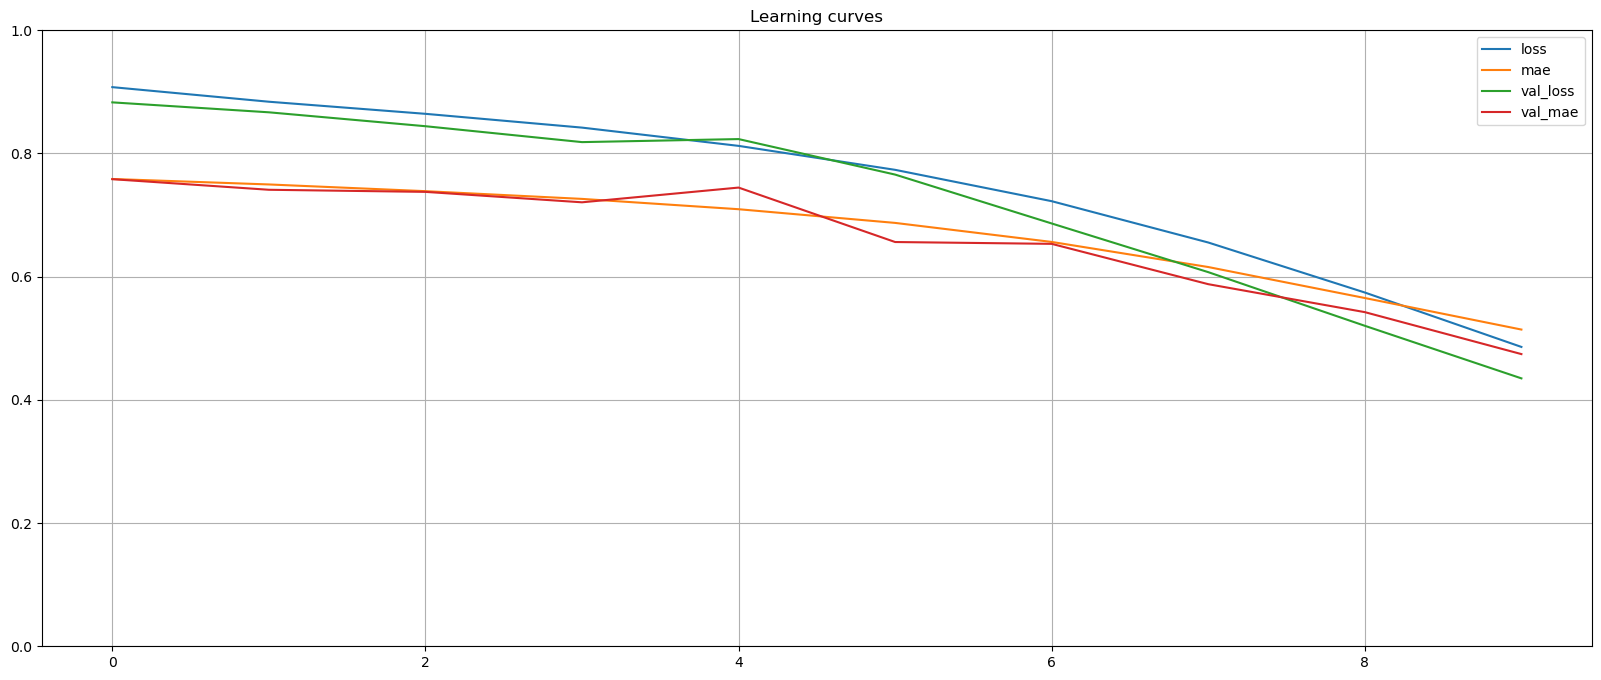

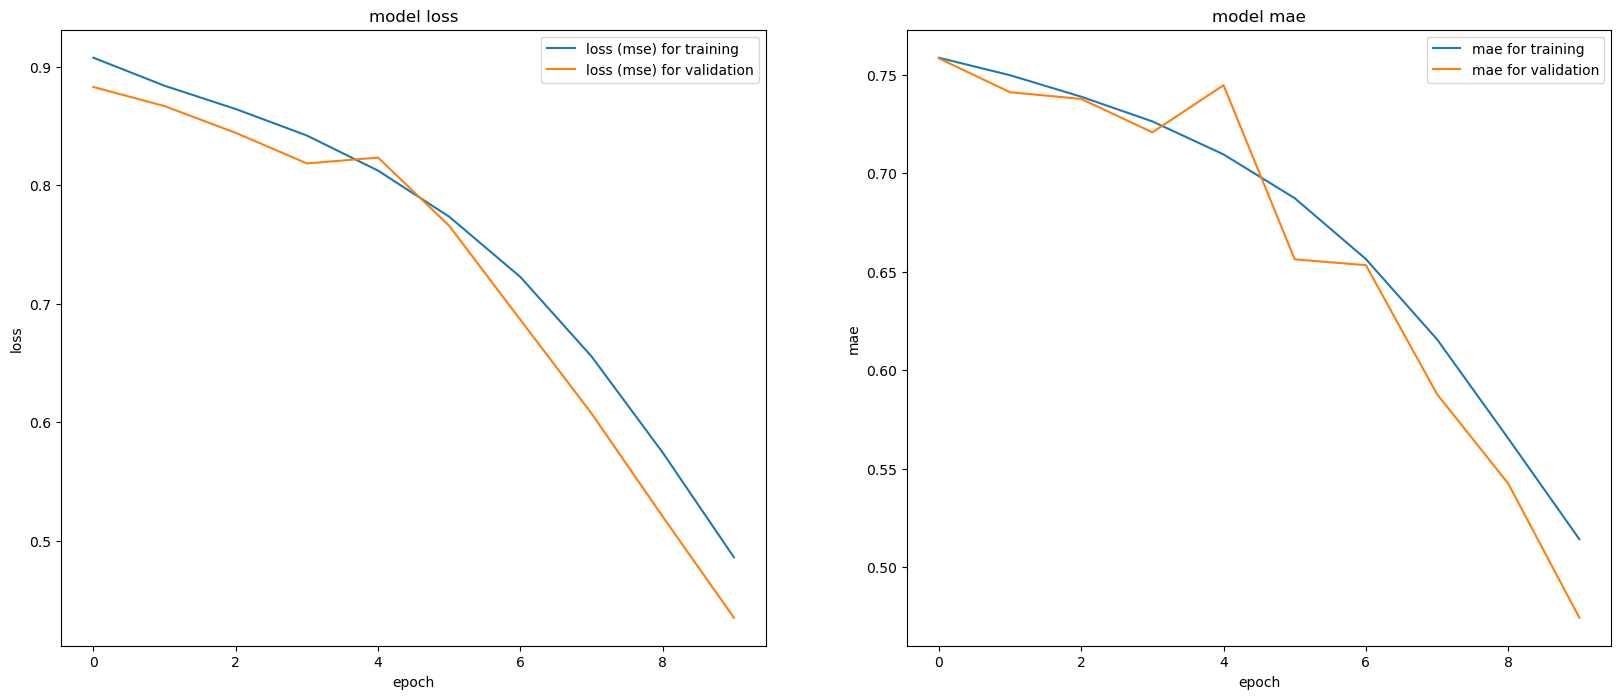

In [19]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4

model_1b = Sequential([
    Dense(64, activation='sigmoid', input_shape=(6,)),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1b.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1b.summary()

tf.keras.utils.plot_model(model_1b, to_file='model_1b.png')
history_1b = model_1b.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1b)

# Evaluation model
evaluation_model(history_1b)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12993 (50.75 KB)
Trainable params: 12993 (50.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install p

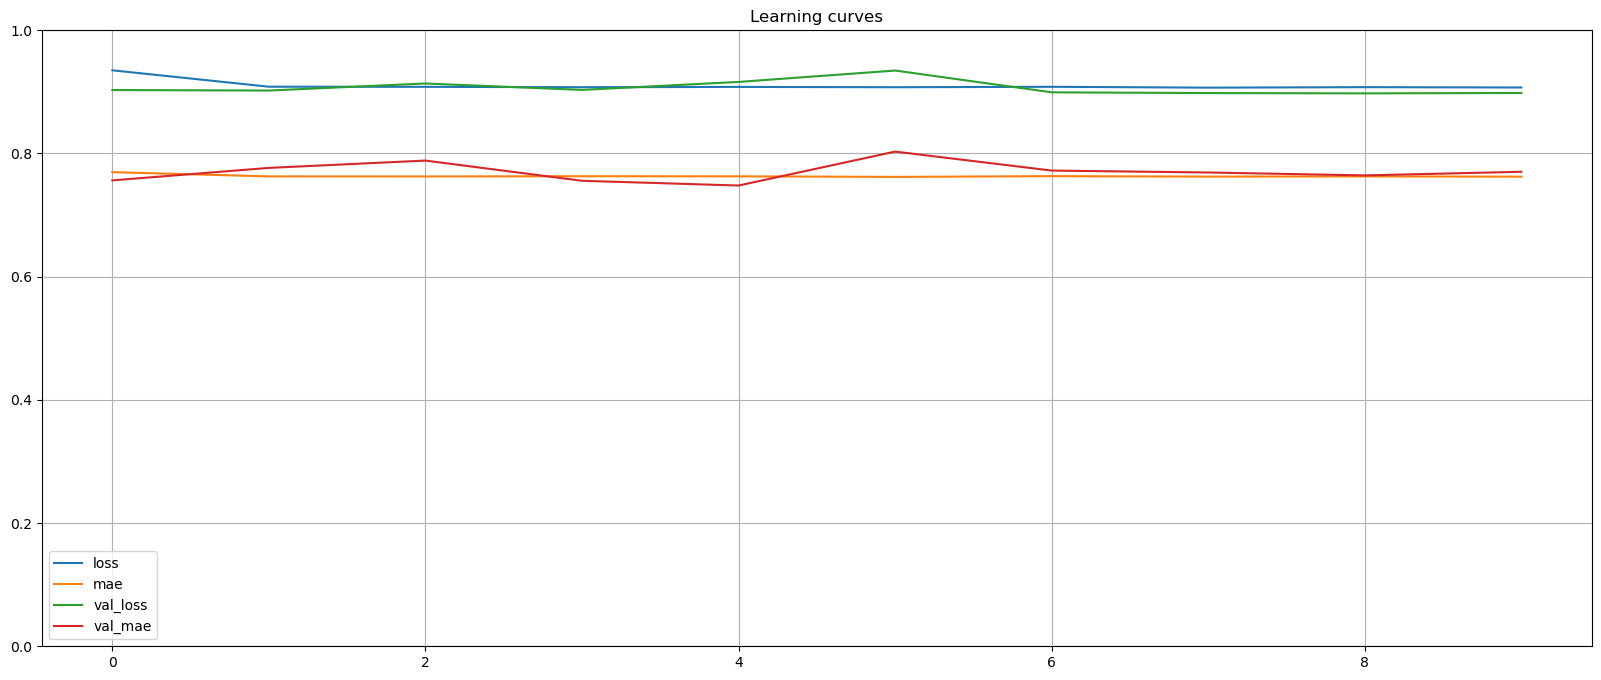

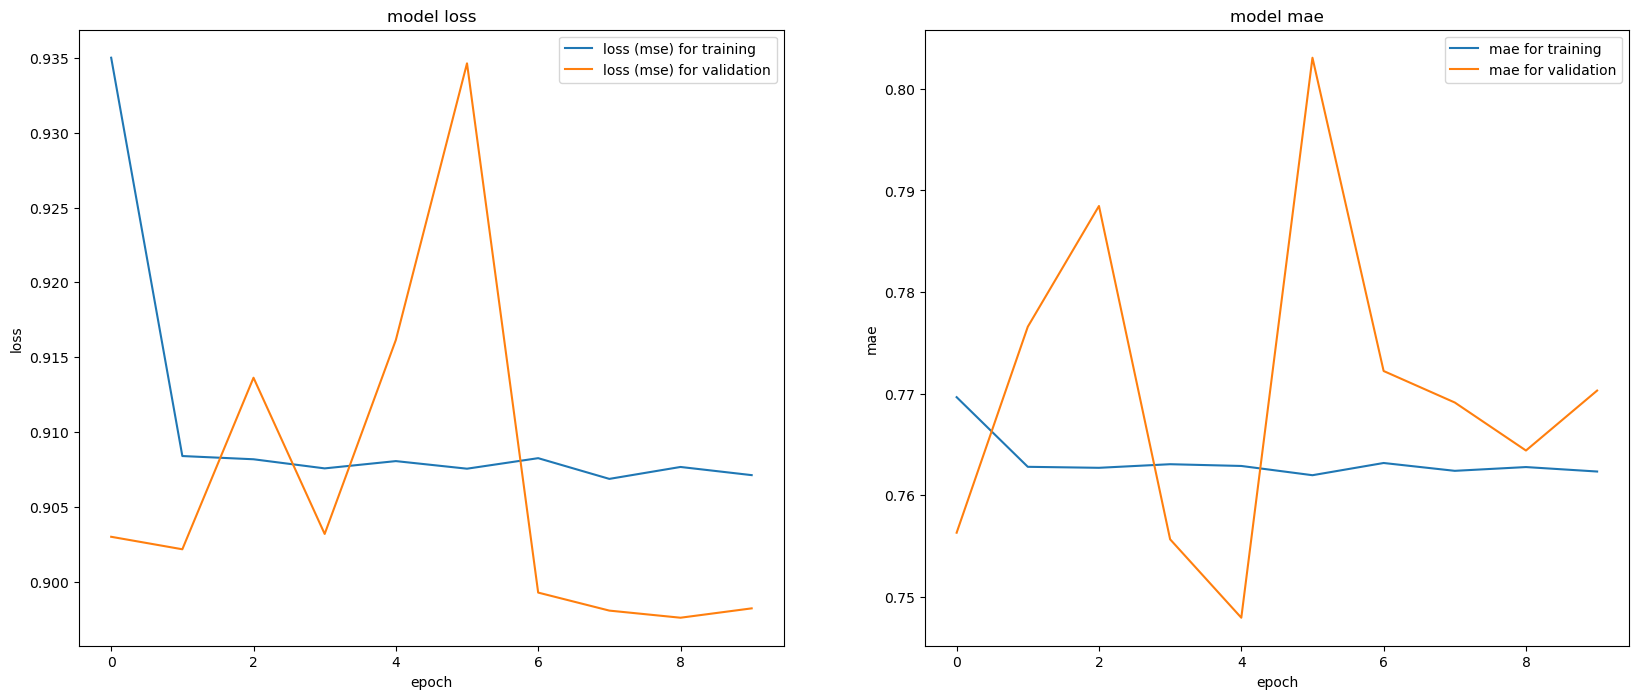

In [20]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers

model_1c = Sequential([
    Dense(64, activation='sigmoid', input_shape=(6,)),
    Dense(64, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1c.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])
model_1c.summary()

tf.keras.utils.plot_model(model_1c, to_file='model_1c.png')

history_1c = model_1c.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1c)

# Evaluation model
evaluation_model(history_1c)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               896       
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75137 (293.50 KB)
Trainable params: 75137 (293.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install

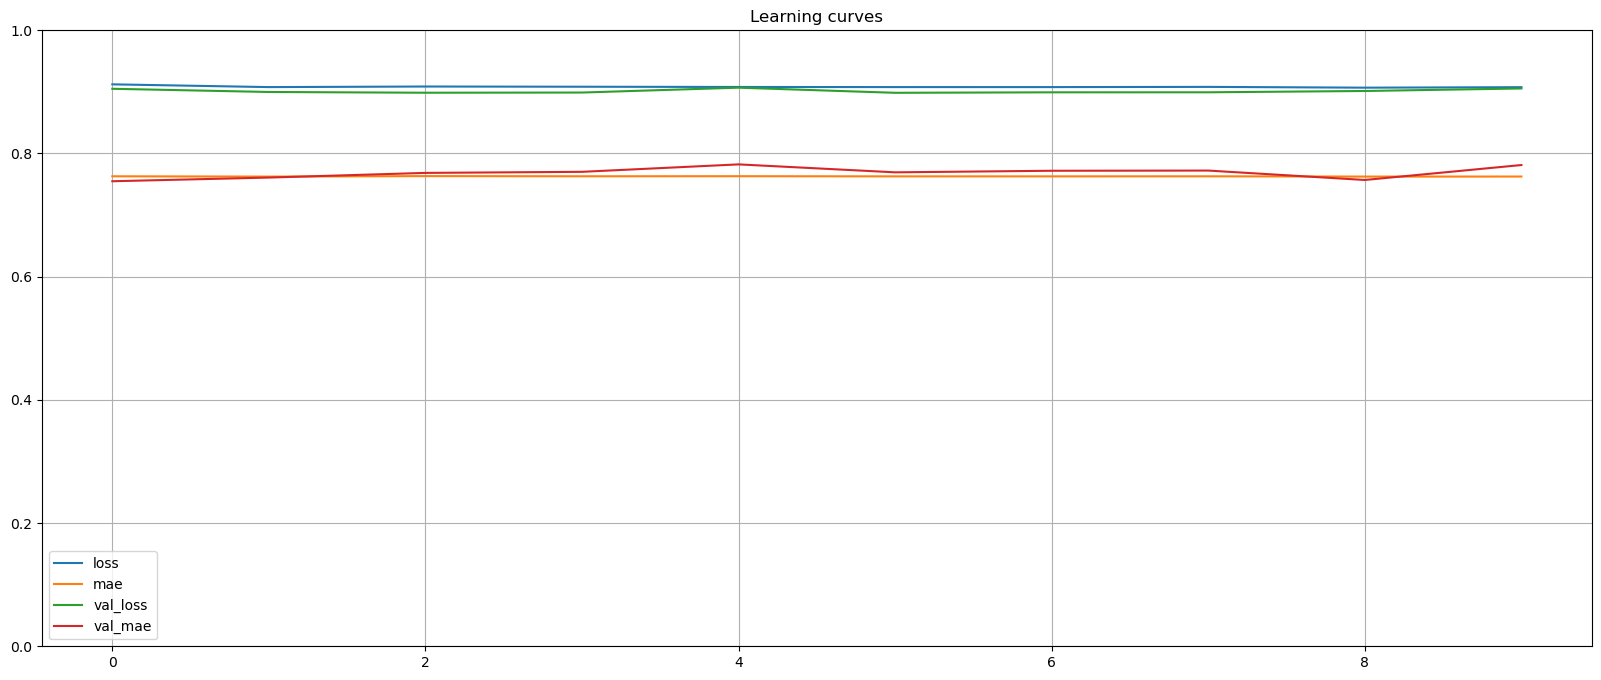

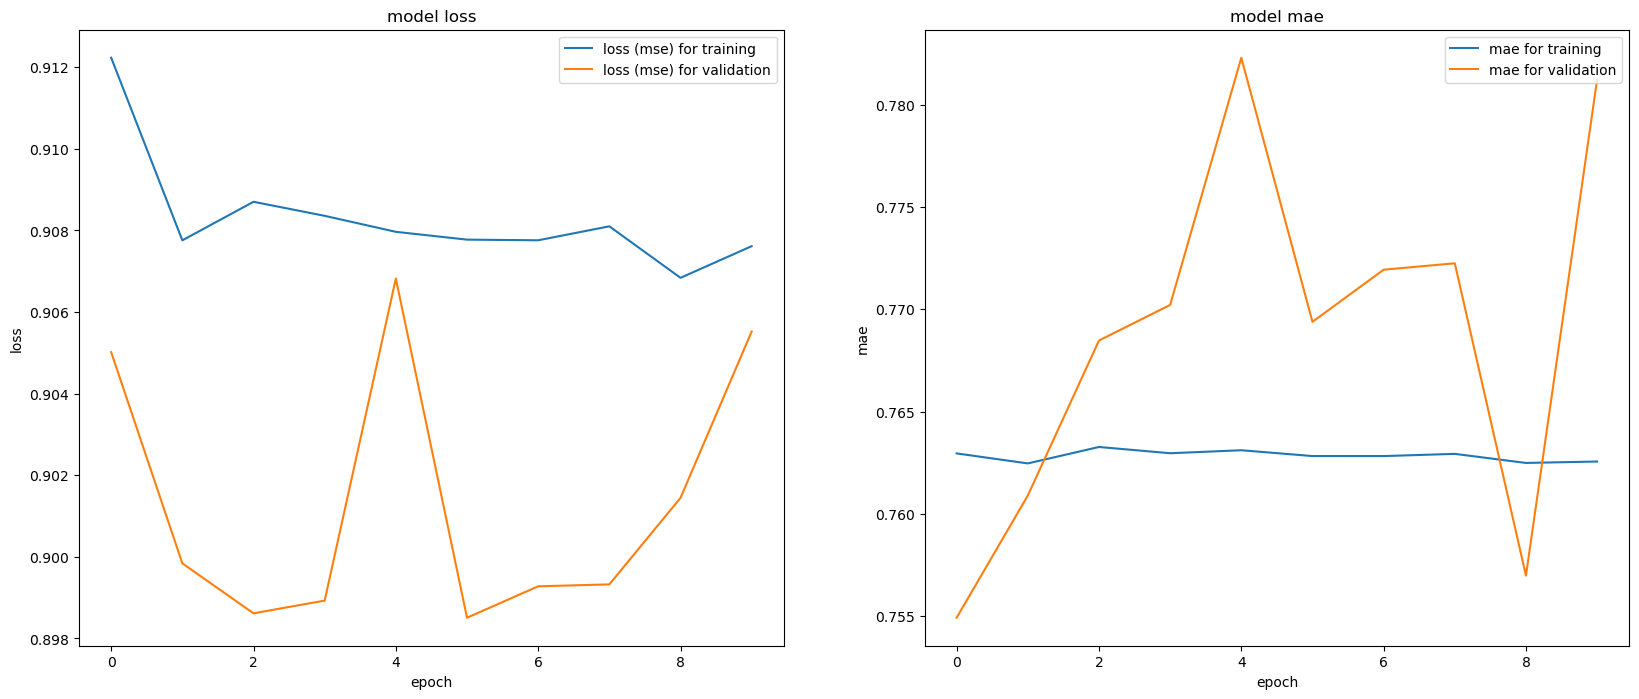

In [21]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers

model_1d = Sequential([
    Dense(128, activation='sigmoid', input_shape=(6,)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1d.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])
model_1d.summary()

tf.keras.utils.plot_model(model_1d, to_file='model_1d.png')

history_1d = model_1d.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1d)

# Evaluation model
evaluation_model(history_1d)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               896       
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75137 (293.50 KB)
Trainable params: 75137 (293.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install

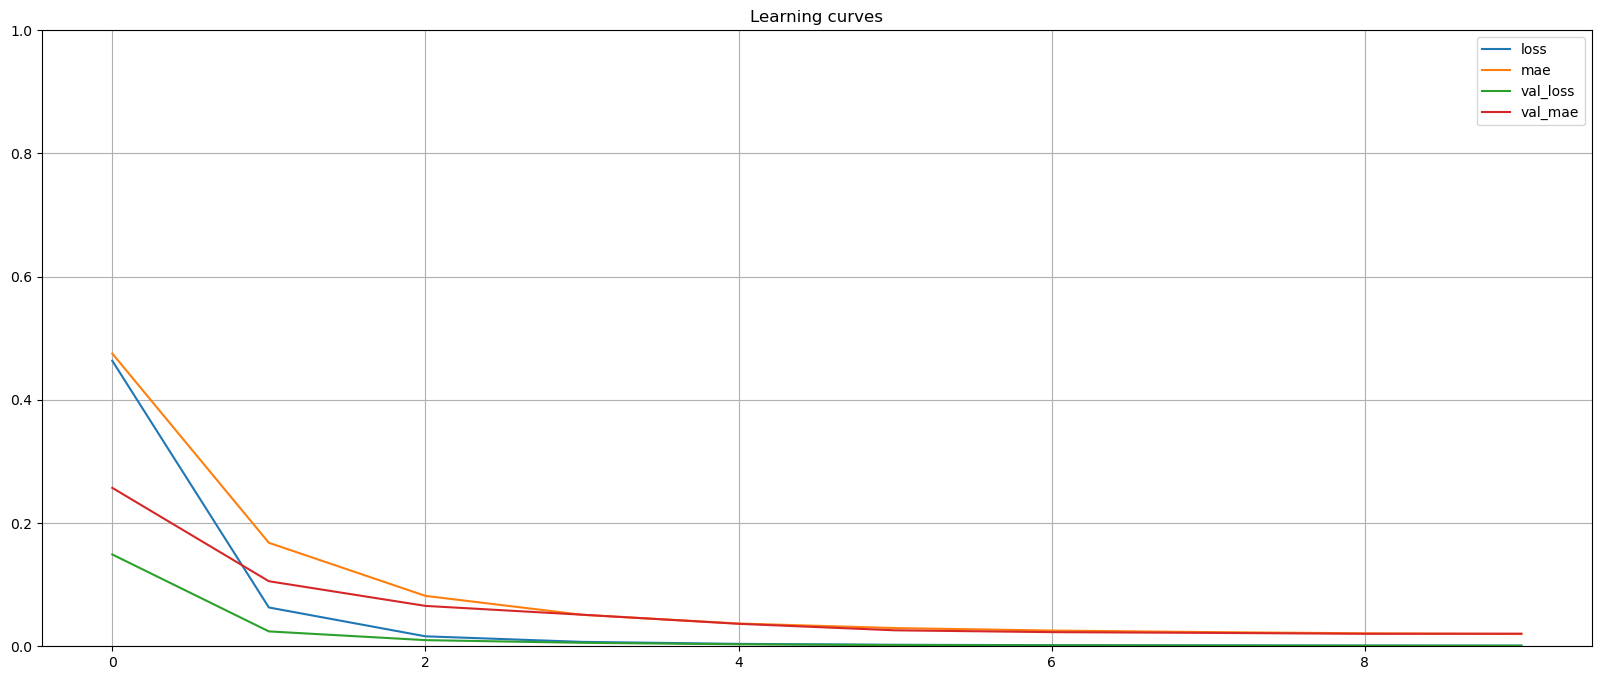

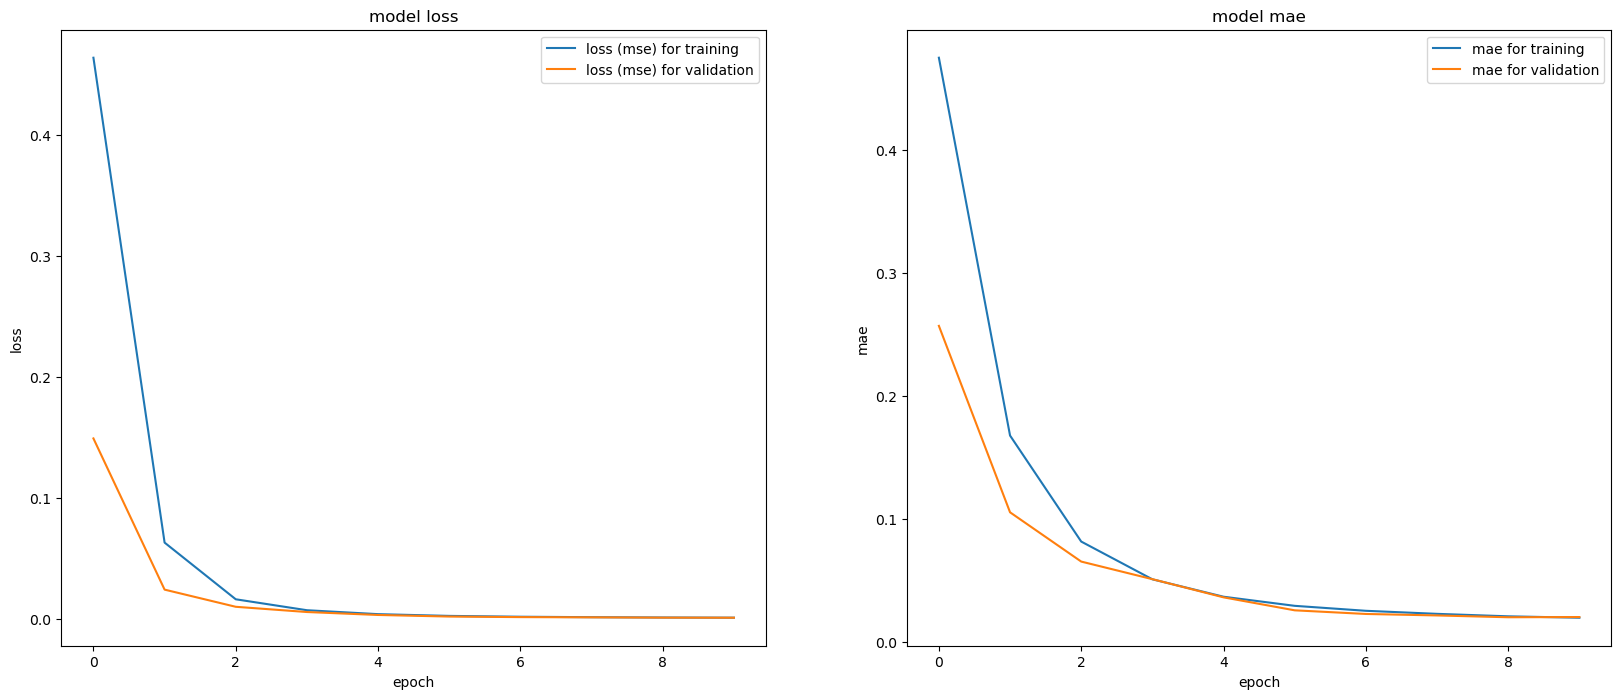

In [22]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function

model_1e = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model_1e.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1e.summary()

tf.keras.utils.plot_model(model_1e, to_file='model_1e.png')

history_1e = model_1e.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1e)
# Evaluation model
evaluation_model(history_1e)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               896       
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75137 (293.50 KB)
Trainable params: 75137 (293.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install

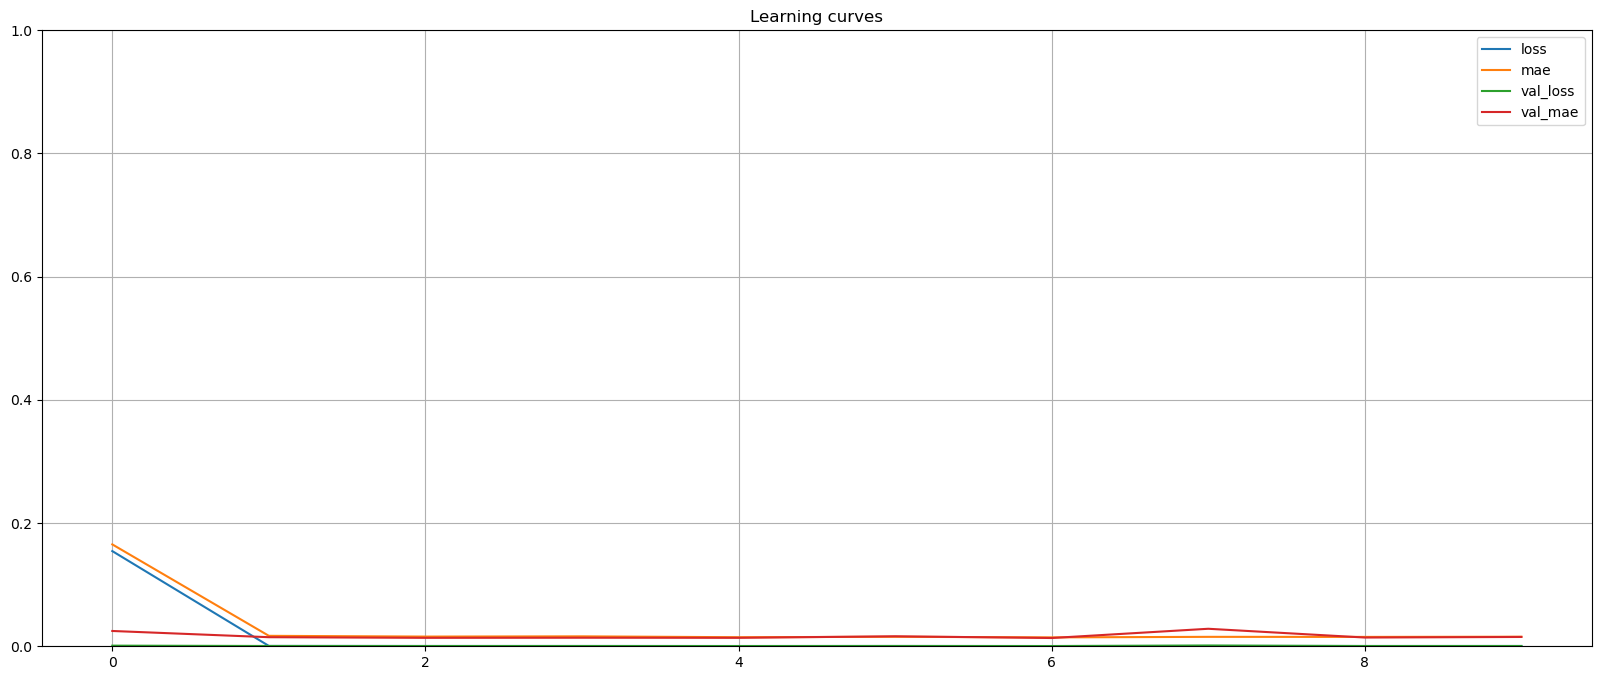

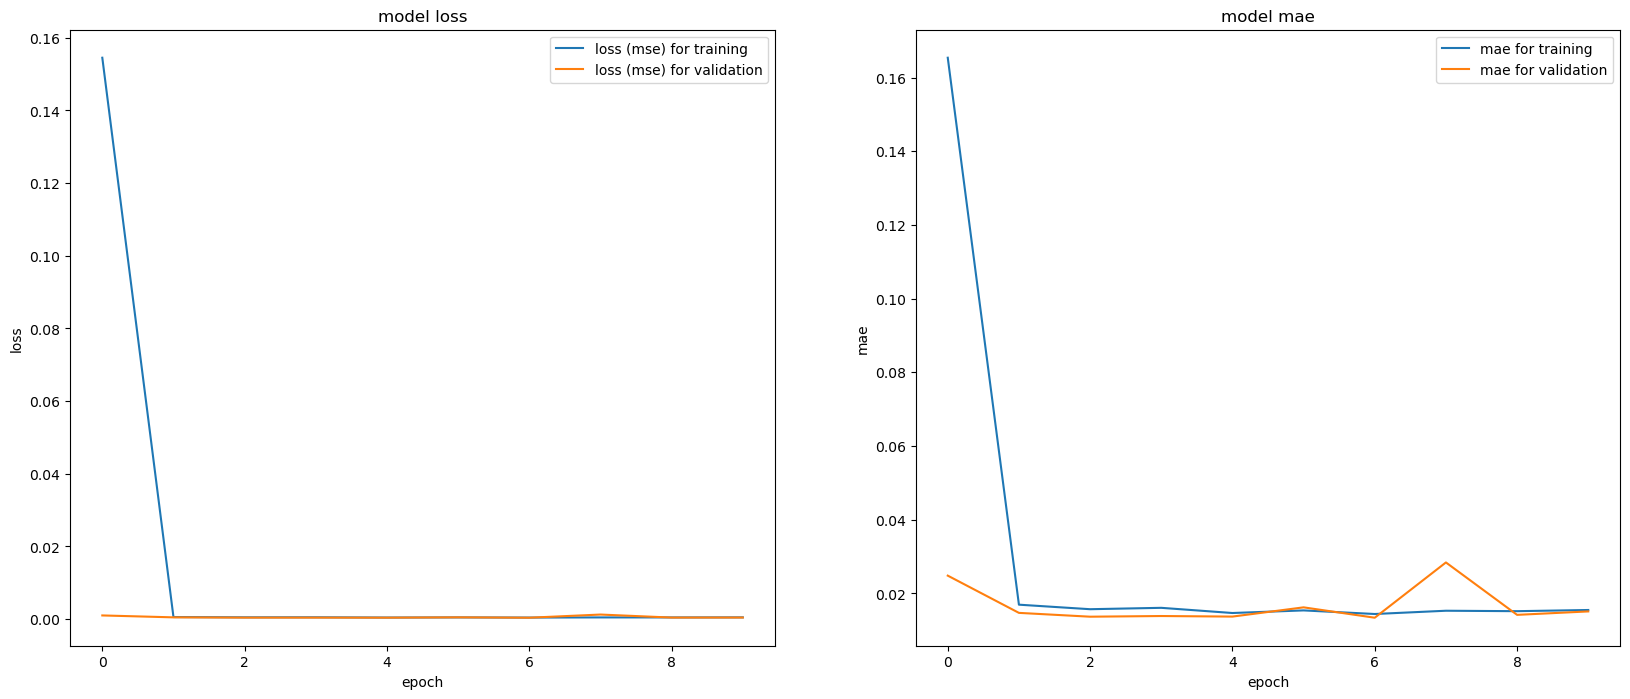

In [23]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function

model_1f = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model_1f.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1f.summary()

tf.keras.utils.plot_model(model_1f, to_file='model_1f.png')

history_1f = model_1f.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1f)
# Evaluation model
evaluation_model(history_1f)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               896       
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75137 (293.50 KB)
Trainable params: 75137 (293.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install

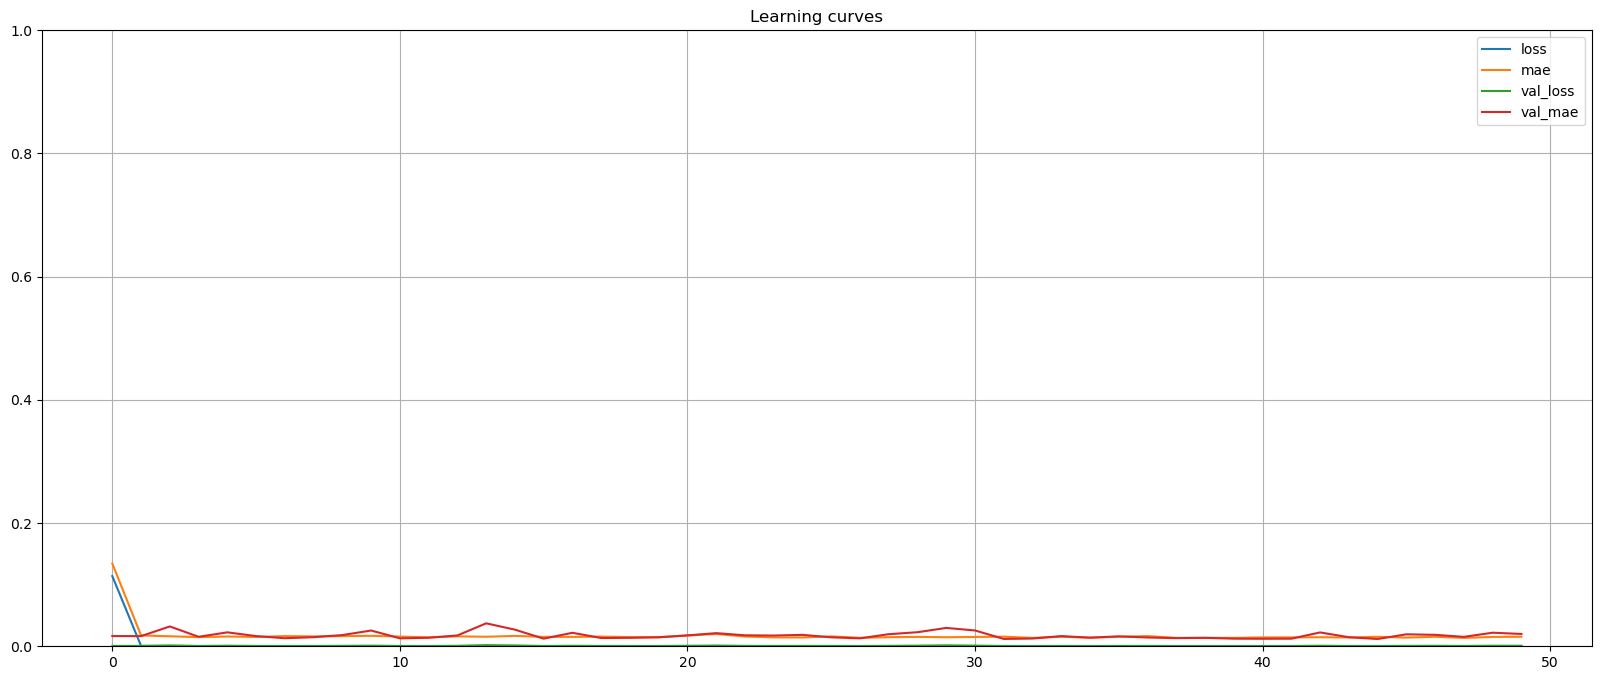

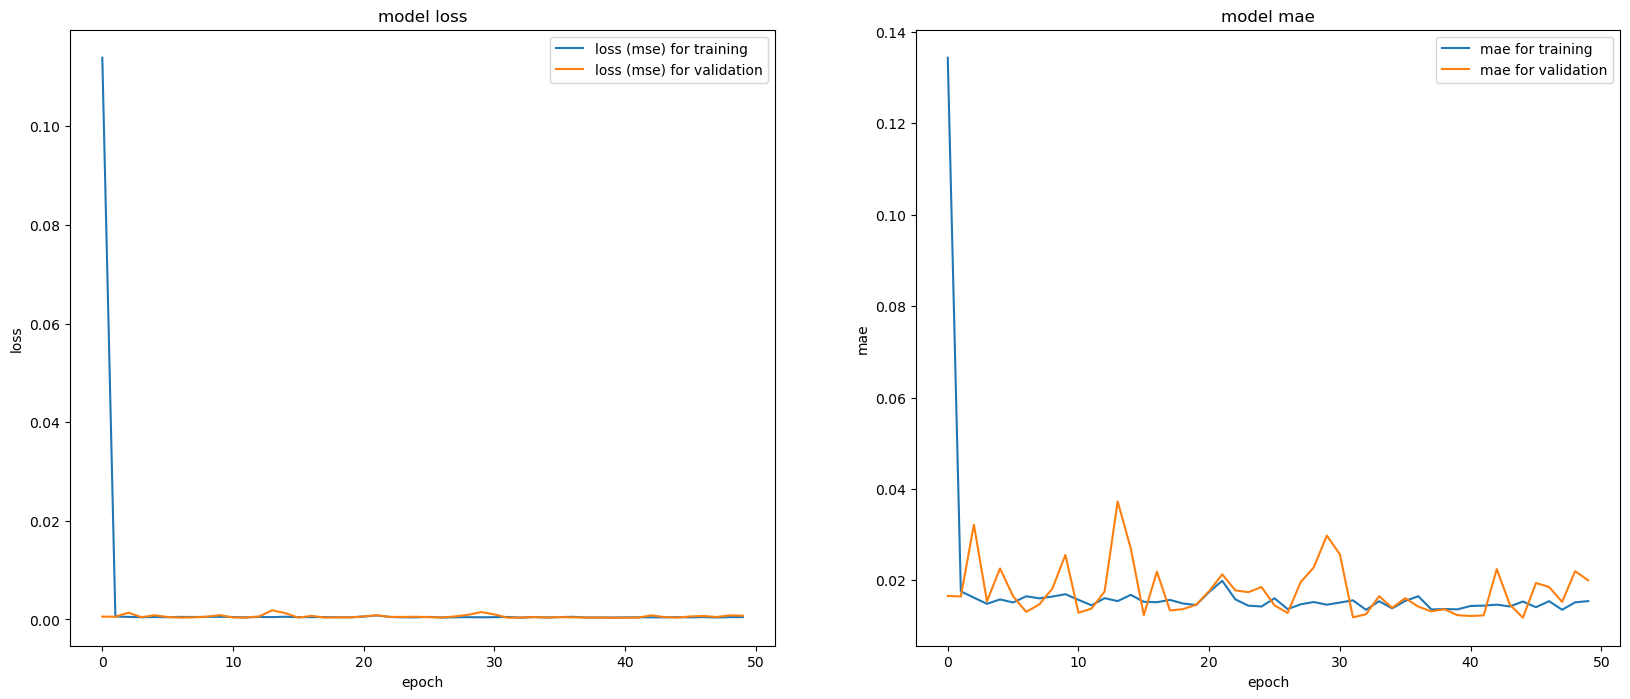

In [24]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs

model_1g = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model_1g.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1g.summary()

tf.keras.utils.plot_model(model_1g, to_file='model_1g.png')

history_1g = model_1g.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1g)
# Evaluation model
evaluation_model(history_1g)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               896       
                                                                 
 dense_32 (Dense)            (None, 256)               33024     
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75137 (293.50 KB)
Trainable params: 75137 (293.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 - 1s - loss: 5.2858e-04 - mae: 0.0163 - val_loss: 5.2393e-04 - val_mae: 0.0164 - 1s/epoch - 6ms/step
Epoch 3/50
225/225 - 1s - loss: 4.7794e-04 - mae: 0.0155 - val_loss: 7.6245e-04 - val_mae: 0.0215 - 1s/epoch - 5ms/step
Epoch 4/50
225/225 - 1s - loss: 4.6360e-04 - mae: 0.0152 - val_loss: 7.1349e-04 - val_mae: 0.0222 - 1s/epoch - 6ms/step
Epoch 5/50
225/225 - 1s - loss: 4.5324e-04 - mae: 0.0150 - val_loss: 0.0012 - val_mae: 0.0261 - 1s/epoch - 5ms/step
Epoch 6/50
225/225 - 1s - loss: 5.9165e-04 - mae: 0.0175 - val_loss: 3.7796e-04 - val_mae: 0.0131 - 1s/epoch - 5ms/step
Epoch 7/50
225/225 - 1s - loss: 4.5370e-04 - mae: 0.0151 - val_loss: 3.5935e-04 - val_mae: 0.0123 - 1s/epoch - 5ms/step
Epoch 8/50
225/225 - 1s - loss: 4.7103e-04 - mae: 0.0154 - val_loss: 3.7561e-04 - val_mae: 0.0128 - 1s/epoch - 5ms/step
Epoch 9/50
225/225 - 1s - loss: 4.2321e-04 - mae: 0.0143 - val_loss: 4.2976e-04 - val_mae: 0.0151 - 1s/epoch - 5ms/step
Epoch 10/50
225/225 - 1s - loss: 5.5547e-04 - mae: 0.01

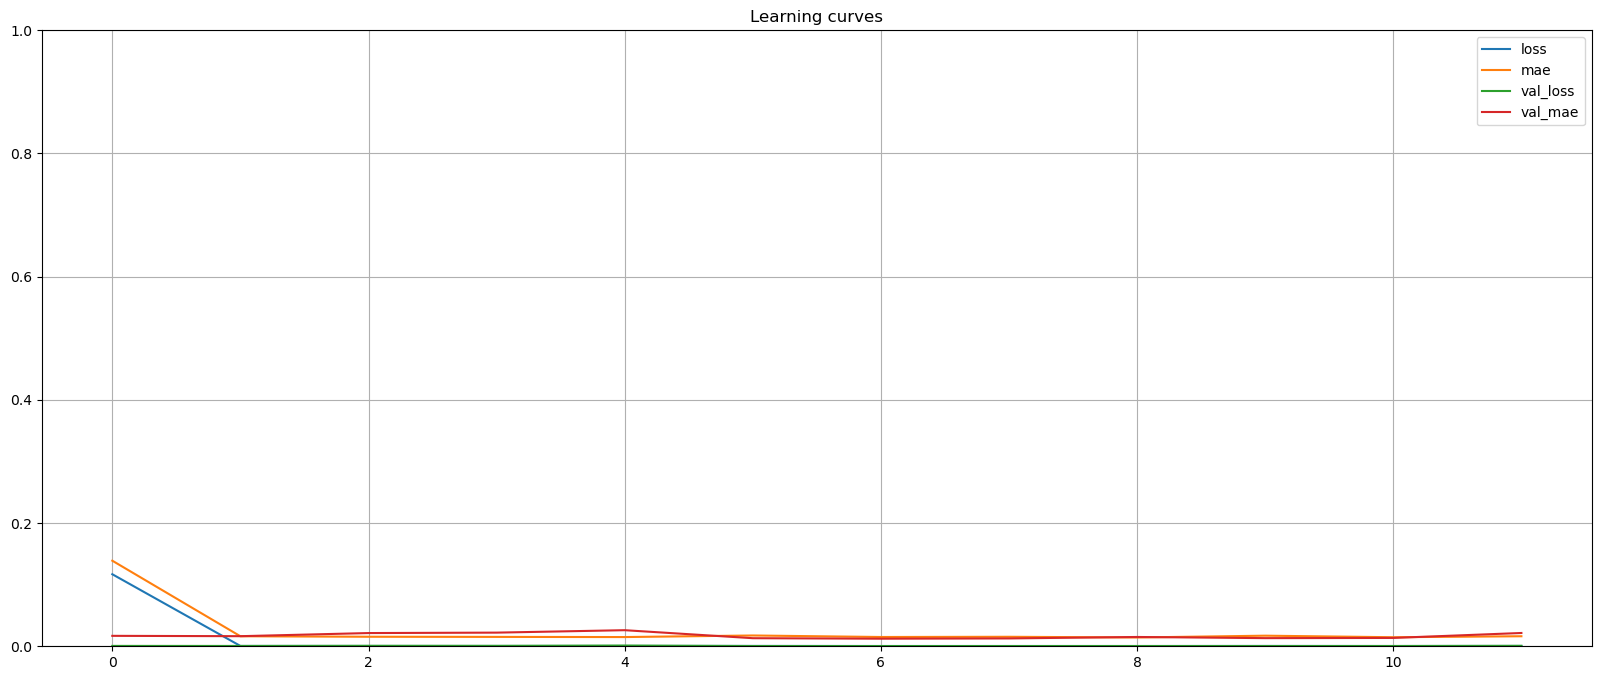

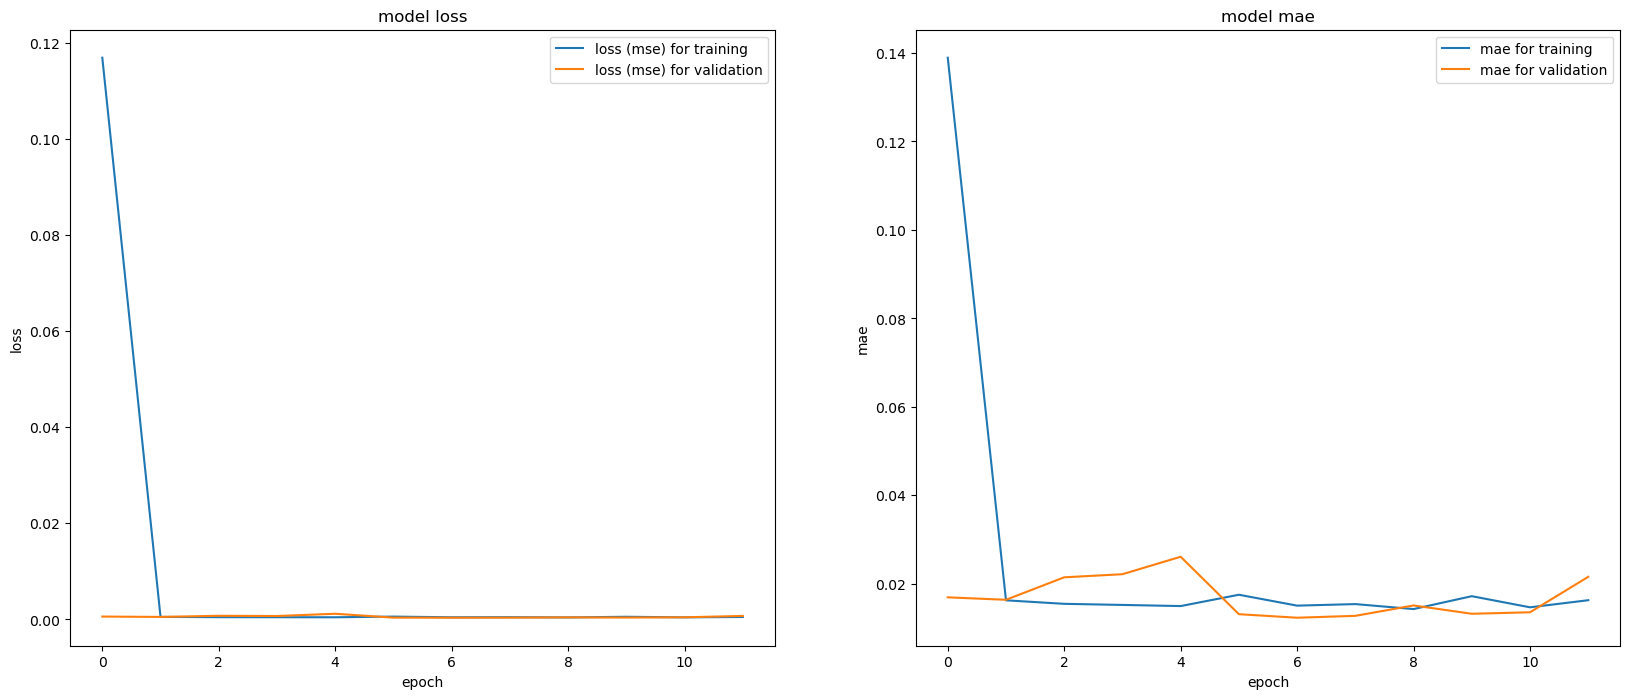

In [25]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model

model_1h = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model_1h.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1h.summary()

tf.keras.utils.plot_model(model_1h, to_file='model_1h.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1h.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     restore_best_weights=True)

history_1h = model_1h.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1h)

# Evaluation model
evaluation_model(history_1h)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               896       
                                                                 
 dense_37 (Dense)            (None, 256)               33024     
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75137 (293.50 KB)
Trainable params: 75137 (293.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 - 2s - loss: 3.5287 - mae: 0.1249 - val_loss: 2.3710 - val_mae: 0.1044 - 2s/epoch - 10ms/step
Epoch 3/50
225/225 - 2s - loss: 1.8265 - mae: 0.0930 - val_loss: 1.3707 - val_mae: 0.0811 - 2s/epoch - 10ms/step
Epoch 4/50
225/225 - 2s - loss: 1.0570 - mae: 0.0767 - val_loss: 0.7930 - val_mae: 0.0712 - 2s/epoch - 8ms/step
Epoch 5/50
225/225 - 4s - loss: 0.6200 - mae: 0.0598 - val_loss: 0.4786 - val_mae: 0.0536 - 4s/epoch - 16ms/step
Epoch 6/50
225/225 - 2s - loss: 0.3902 - mae: 0.0449 - val_loss: 0.3200 - val_mae: 0.0344 - 2s/epoch - 8ms/step
Epoch 7/50
225/225 - 1s - loss: 0.2852 - mae: 0.0369 - val_loss: 0.2614 - val_mae: 0.0349 - 1s/epoch - 5ms/step
Epoch 8/50
225/225 - 1s - loss: 0.2520 - mae: 0.0350 - val_loss: 0.2448 - val_mae: 0.0340 - 1s/epoch - 5ms/step
Epoch 9/50
225/225 - 1s - loss: 0.2413 - mae: 0.0343 - val_loss: 0.2379 - val_mae: 0.0334 - 1s/epoch - 6ms/step
Epoch 10/50
225/225 - 1s - loss: 0.2356 - mae: 0.0334 - val_loss: 0.2327 - val_mae: 0.0334 - 1s/epoch - 5ms/step

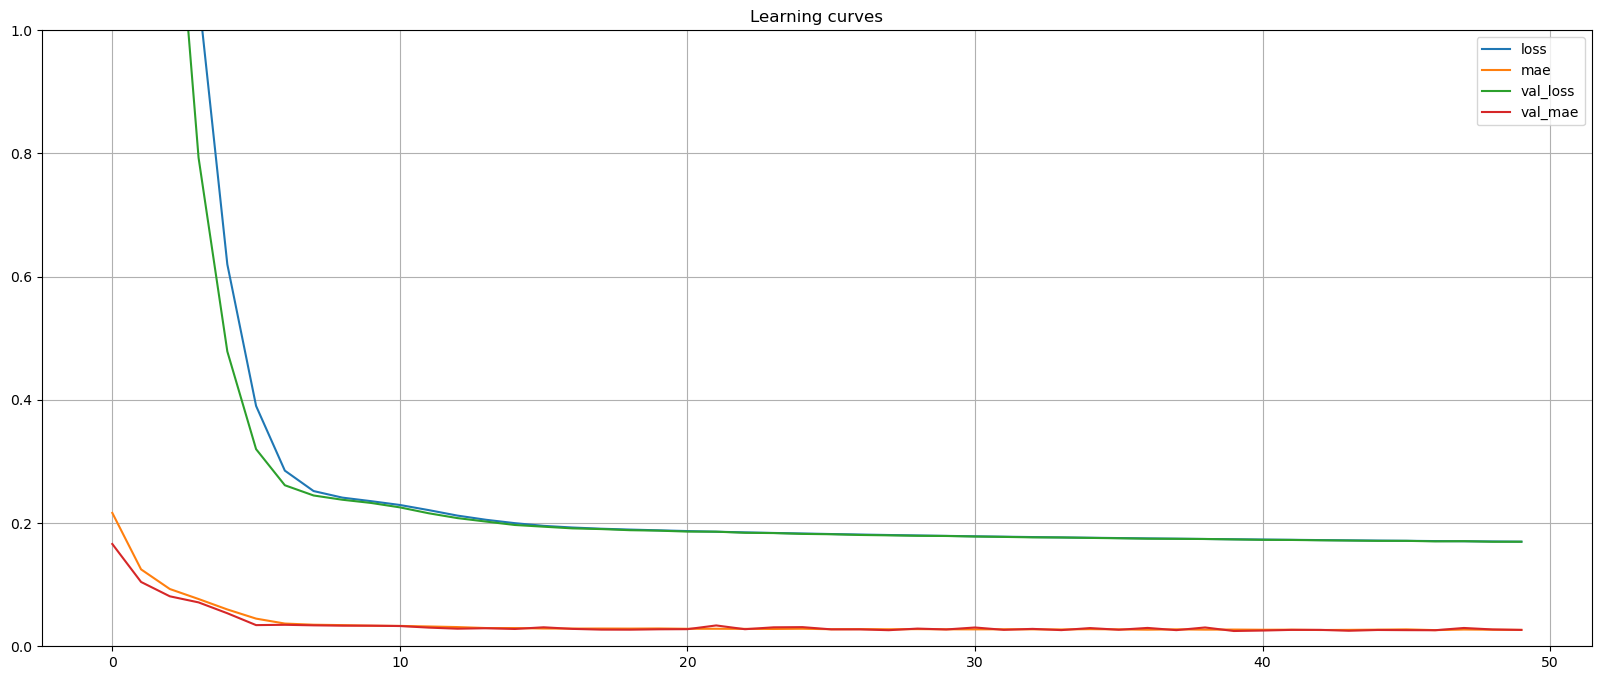

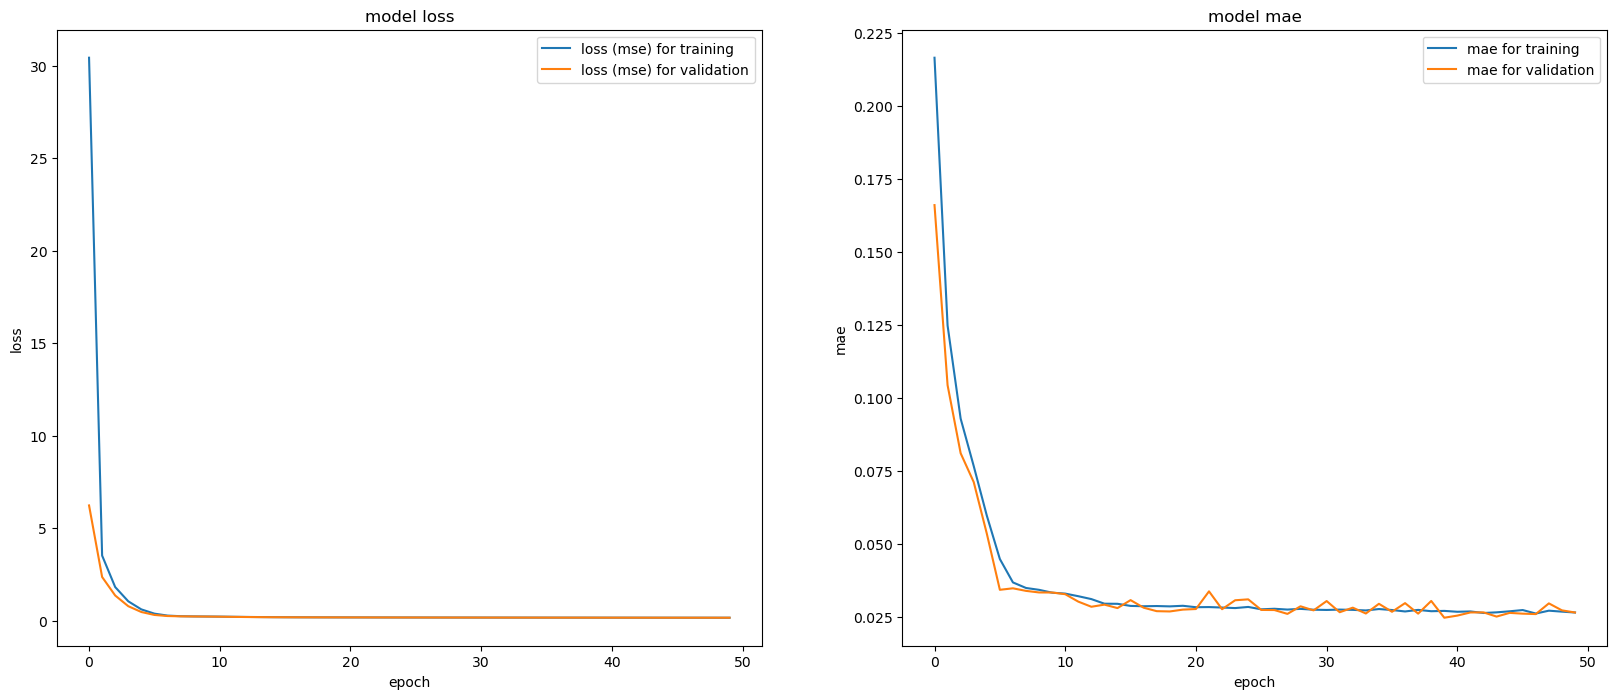

In [26]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model
# + Applying L1 and L2 regularization

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))
model_1i = Sequential([
    RegularizedDense(128, input_shape=(6,)),
    RegularizedDense(256),
    RegularizedDense(128),
    RegularizedDense(64),
    Dense(1, activation='linear')
])

model_1i.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1i.summary()
tf.keras.utils.plot_model(model_1i, to_file='model_1i.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1i.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

history_1i = model_1i.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1i)

# Evaluation model
evaluation_model(history_1i)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 128)               896       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_44 (Dense)            (None, 64)               

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 - 2s - loss: 4.4856 - mae: 0.4014 - val_loss: 2.8021 - val_mae: 0.2855 - 2s/epoch - 7ms/step
Epoch 3/50
225/225 - 1s - loss: 2.2989 - mae: 0.3754 - val_loss: 1.6431 - val_mae: 0.2605 - 1s/epoch - 5ms/step
Epoch 4/50
225/225 - 1s - loss: 1.4813 - mae: 0.3645 - val_loss: 1.0791 - val_mae: 0.2715 - 1s/epoch - 6ms/step
Epoch 5/50
225/225 - 3s - loss: 1.0599 - mae: 0.3587 - val_loss: 0.7761 - val_mae: 0.2541 - 3s/epoch - 11ms/step
Epoch 6/50
225/225 - 3s - loss: 0.8523 - mae: 0.3573 - val_loss: 0.6437 - val_mae: 0.2612 - 3s/epoch - 11ms/step
Epoch 7/50
225/225 - 2s - loss: 0.7546 - mae: 0.3559 - val_loss: 0.5639 - val_mae: 0.2445 - 2s/epoch - 8ms/step
Epoch 8/50
225/225 - 2s - loss: 0.7115 - mae: 0.3573 - val_loss: 0.5408 - val_mae: 0.2477 - 2s/epoch - 7ms/step
Epoch 9/50
225/225 - 2s - loss: 0.6938 - mae: 0.3584 - val_loss: 0.5362 - val_mae: 0.2528 - 2s/epoch - 7ms/step
Epoch 10/50
225/225 - 2s - loss: 0.6923 - mae: 0.3577 - val_loss: 0.5198 - val_mae: 0.2425 - 2s/epoch - 7ms/step


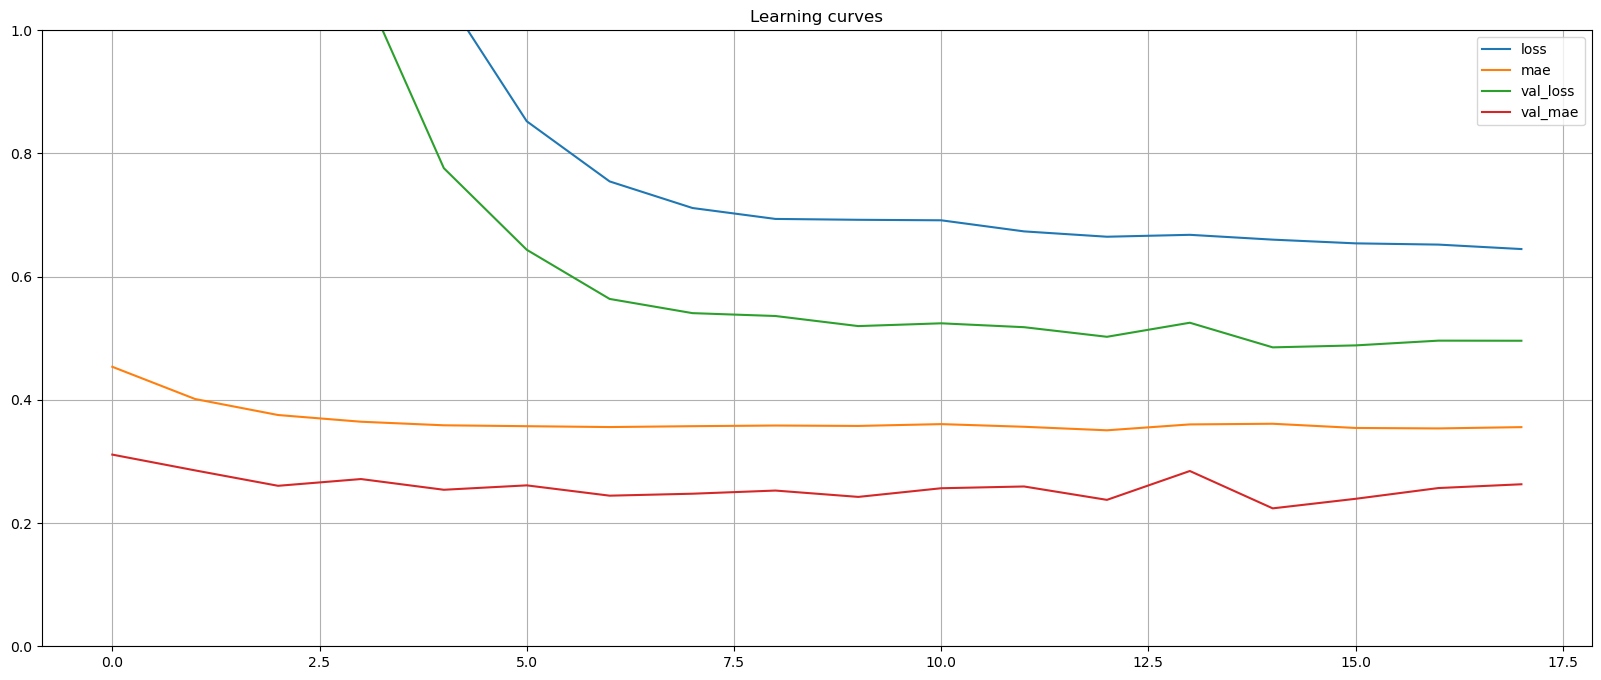

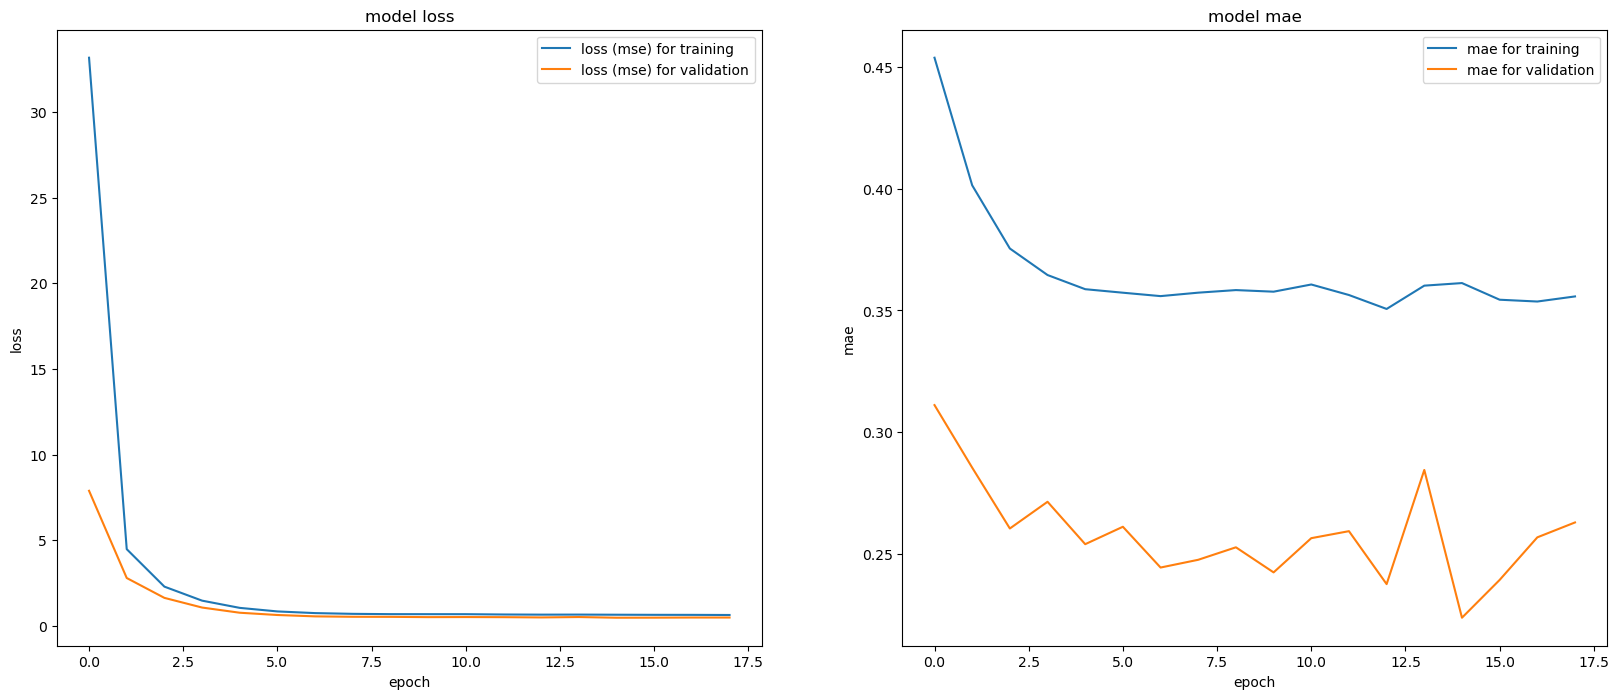

In [27]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model
# + Applying L1 and L2 regularization
# + Applying Dropout

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))
model_1j = Sequential([
    RegularizedDense(128, input_shape=(6,)),
    Dropout(rate=0.3),
    RegularizedDense(256),
    Dropout(rate=0.3),
    RegularizedDense(128),
    Dropout(rate=0.3),
    RegularizedDense(64),
    Dropout(rate=0.3),
    Dense(1, activation='linear')
])
model_1j.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1j.summary()

tf.keras.utils.plot_model(model_1j, to_file='model_1j.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1j.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)
history_1j = model_1j.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1j)

# Evaluation model
evaluation_model(history_1j)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 128)               896       
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 256)             

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 - 2s - loss: 14.0526 - mae: 0.4122 - val_loss: 7.4522 - val_mae: 0.6733 - 2s/epoch - 9ms/step
Epoch 3/50
225/225 - 3s - loss: 4.5724 - mae: 0.2943 - val_loss: 3.4069 - val_mae: 0.6600 - 3s/epoch - 13ms/step
Epoch 4/50
225/225 - 2s - loss: 2.0456 - mae: 0.2405 - val_loss: 1.7311 - val_mae: 0.5240 - 2s/epoch - 10ms/step
Epoch 5/50
225/225 - 2s - loss: 1.0719 - mae: 0.2133 - val_loss: 1.3914 - val_mae: 0.6736 - 2s/epoch - 10ms/step
Epoch 6/50
225/225 - 2s - loss: 0.5930 - mae: 0.2040 - val_loss: 0.6249 - val_mae: 0.4509 - 2s/epoch - 10ms/step
Epoch 7/50
225/225 - 2s - loss: 0.3615 - mae: 0.2008 - val_loss: 0.4315 - val_mae: 0.4149 - 2s/epoch - 10ms/step
Epoch 8/50
225/225 - 2s - loss: 0.2519 - mae: 0.1970 - val_loss: 0.4437 - val_mae: 0.3987 - 2s/epoch - 9ms/step
Epoch 9/50
225/225 - 2s - loss: 0.2162 - mae: 0.2003 - val_loss: 0.1738 - val_mae: 0.1622 - 2s/epoch - 10ms/step
Epoch 10/50
225/225 - 2s - loss: 0.2021 - mae: 0.1986 - val_loss: 0.1961 - val_mae: 0.2424 - 2s/epoch - 9ms/

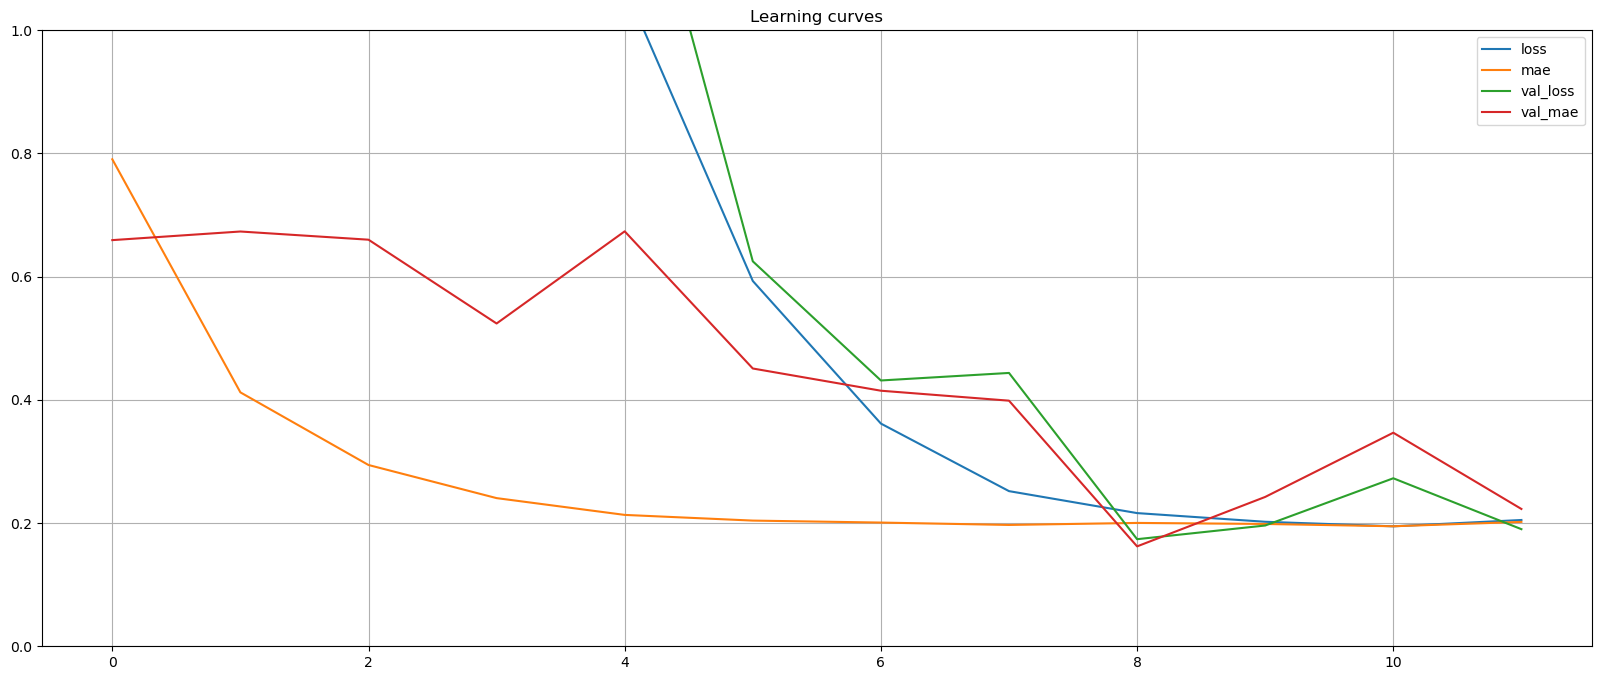

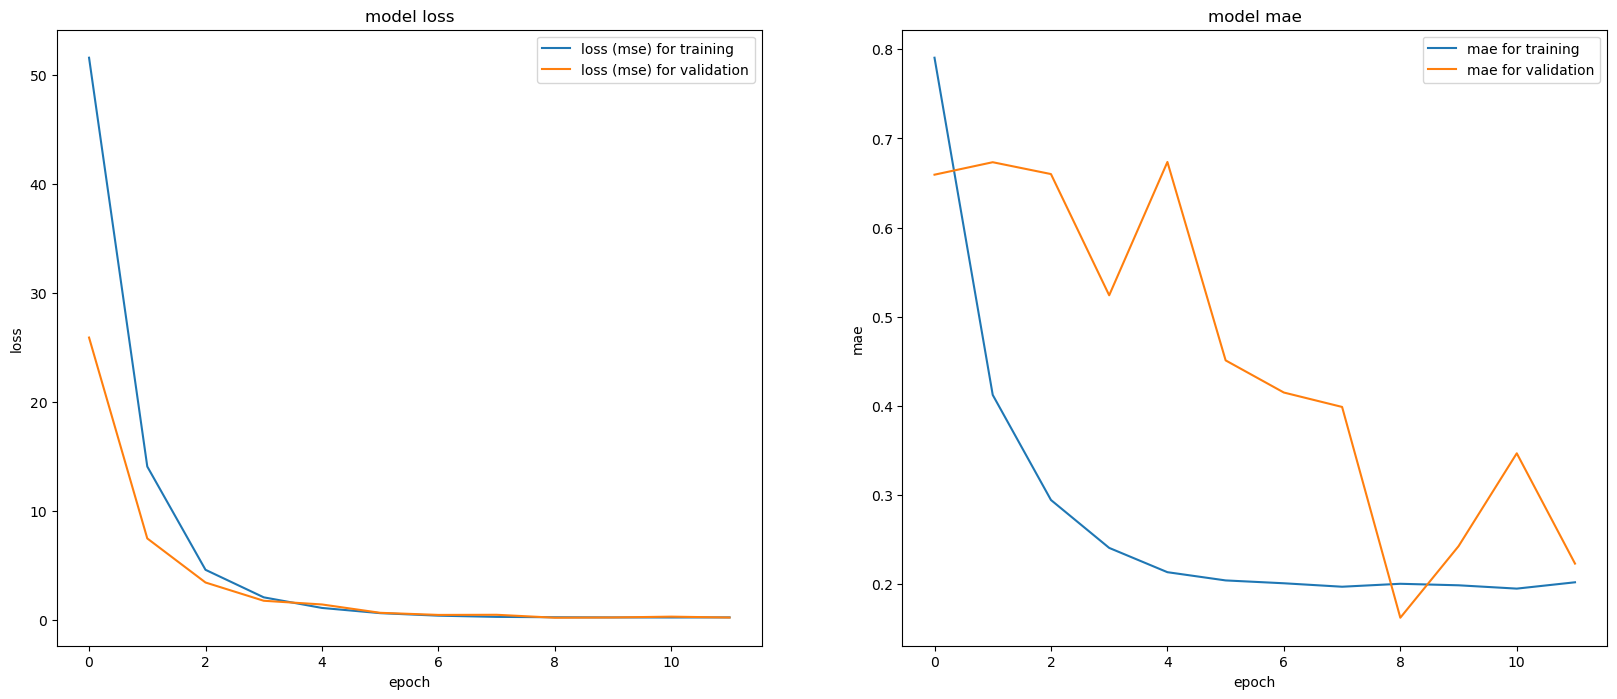

In [28]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model
# + Applying L1 and L2 regularization
# + Applying Dropout
# + Applying BatchNormalization

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))
model_1k = Sequential([
    RegularizedDense(128, input_shape=(6,)),
    BatchNormalization(),
    Dropout(rate=0.3),

    RegularizedDense(256),
    BatchNormalization(),
    Dropout(rate=0.3),

    RegularizedDense(128),
    BatchNormalization(),
    Dropout(rate=0.3),

    RegularizedDense(64),
    BatchNormalization(),
    Dropout(rate=0.3),

    Dense(1, activation='linear')
])

model_1k.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1k.summary()

tf.keras.utils.plot_model(model_1k, to_file='model_1k.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1k.h5",
                                                   save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

history_1k = model_1k.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1k)

# Evaluation model
evaluation_model(history_1k)

In [29]:
# COMPARISON OF MODEL RESULTS

def model_rmse(model):
    # Predictions
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_preds_train))
    # print('Train Score: %.2f RMSE' % (trainScore))

    testScore = math.sqrt(mean_squared_error(y_test, y_preds_test))
    # print('Test Score: %.2f RMSE' % (testScore))
    return trainScore, testScore

641/641 - 2s - loss: 6.8163 - mae: 2.5463 - 2s/epoch - 2ms/step
641/641 - 1s - loss: 4.7555 - mae: 1.9925 - 1s/epoch - 2ms/step
641/641 - 1s - loss: 0.9056 - mae: 0.7718 - 950ms/epoch - 1ms/step
641/641 - 1s - loss: 0.9084 - mae: 0.7772 - 823ms/epoch - 1ms/step
641/641 - 1s - loss: 15931.5244 - mae: 124.6264 - 779ms/epoch - 1ms/step
641/641 - 1s - loss: 6549.2266 - mae: 78.1802 - 805ms/epoch - 1ms/step
641/641 - 1s - loss: 8710.3789 - mae: 88.9307 - 788ms/epoch - 1ms/step
641/641 - 1s - loss: 14338.1963 - mae: 118.2396 - 760ms/epoch - 1ms/step
641/641 - 1s - loss: 988.4821 - mae: 25.5312 - 833ms/epoch - 1ms/step
641/641 - 1s - loss: 1005.4794 - mae: 23.4790 - 855ms/epoch - 1ms/step
641/641 - 1s - loss: 1964.1257 - mae: 41.2935 - 1s/epoch - 2ms/step
641/641 [==============================] - 1s 2ms/step


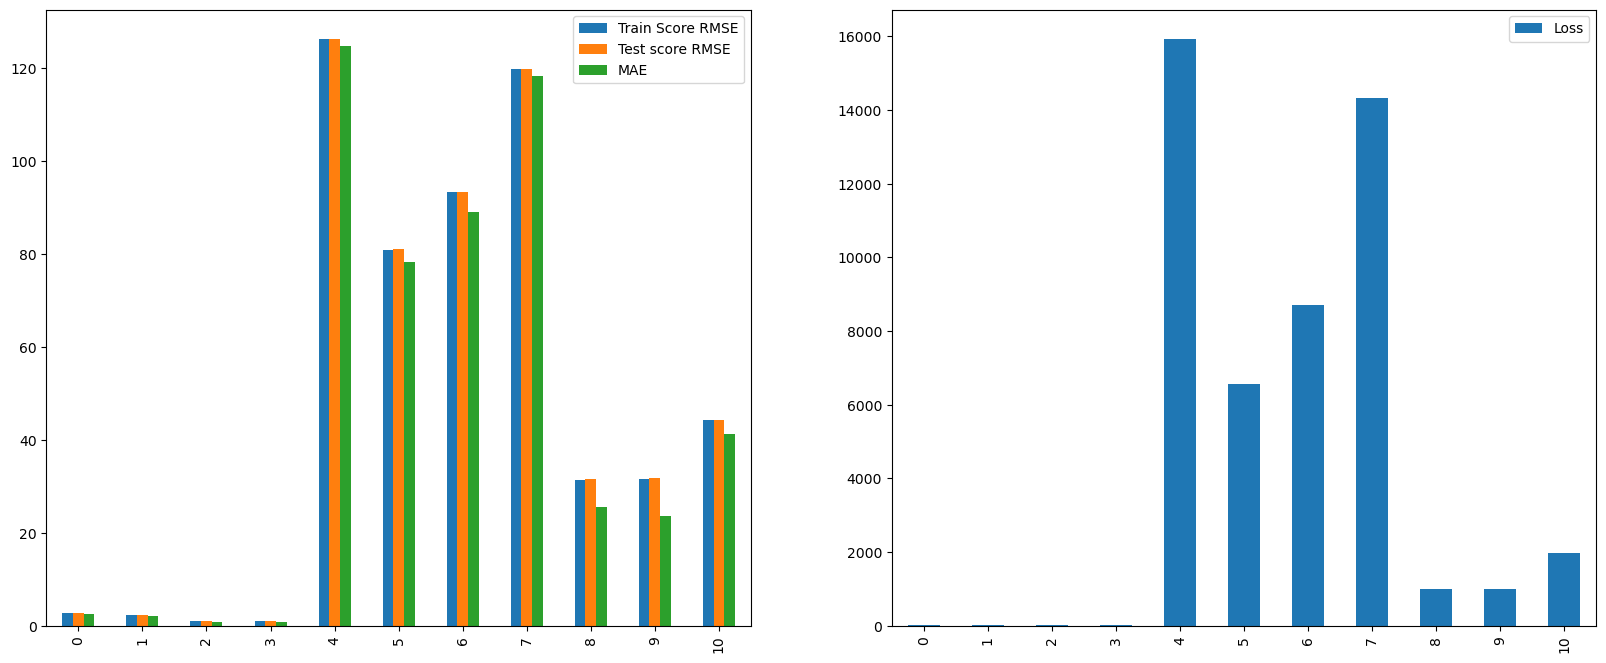

In [30]:
# 0 - Basic model with three fully connected layers
# 1 - Increasing validation_split to 0.4
# 2 - Adding two additional layers
# 3 - Increasing the number of neurons in the hidden layers
# 4 - Changing the activation function
# 5 - Changing the optimization function
# 6 - Increasing the number of training epochs
# 7 - Applying an early stopping and saving the best model
# 8 - Applying L1 and L2 regularization
# 9 - Applying Dropout
# 10 - Applying BatchNormalization


# Evaluate the model on the test set
evaluate_1a = model_1a.evaluate(X_test, y_test, verbose=2)
evaluate_1b = model_1b.evaluate(X_test, y_test, verbose=2)
evaluate_1c = model_1c.evaluate(X_test, y_test, verbose=2)
evaluate_1d = model_1d.evaluate(X_test, y_test, verbose=2)
evaluate_1e = model_1e.evaluate(X_test, y_test, verbose=2)
evaluate_1f = model_1f.evaluate(X_test, y_test, verbose=2)
evaluate_1g = model_1g.evaluate(X_test, y_test, verbose=2)
evaluate_1h = model_1h.evaluate(X_test, y_test, verbose=2)
evaluate_1i = model_1i.evaluate(X_test, y_test, verbose=2)
evaluate_1j = model_1j.evaluate(X_test, y_test, verbose=2)
evaluate_1k = model_1k.evaluate(X_test, y_test, verbose=2)

model_results = [["model_1a", "Basic model with three fully connected layers", model_rmse(model_1a)[0], model_rmse(model_1a)[1], evaluate_1a[0], evaluate_1a[1]],
                 ["model_1b",  "Increasing validation_split to 0.4", model_rmse(model_1b)[0], model_rmse(model_1b)[1], evaluate_1b[0], evaluate_1b[1]],
                 ["model_1c",  "Adding two additional layers", model_rmse(model_1c)[0], model_rmse(model_1c)[1], evaluate_1c[0], evaluate_1c[1]],
                 ["model_1d",  "Increasing the number of neurons in the hidden layers", model_rmse(model_1d)[0], model_rmse(model_1d)[1], evaluate_1d[0], evaluate_1d[1]],
                 ["model_1e",  "Changing the activation function", model_rmse(model_1e)[0], model_rmse(model_1e)[1], evaluate_1e[0], evaluate_1e[1]],
                 ["model_1f",  "Changing the optimization function", model_rmse(model_1f)[0], model_rmse(model_1f)[1], evaluate_1f[0], evaluate_1f[1]],
                 ["model_1g",  "Increasing the number of training epochs", model_rmse(model_1g)[0], model_rmse(model_1g)[1], evaluate_1g[0], evaluate_1g[1]],
                 ["model_1h",  "Applying an early stopping and saving the best model", model_rmse(model_1h)[0], model_rmse(model_1h)[1], evaluate_1h[0], evaluate_1h[1]],
                 ["model_1i",  "Applying L1 and L2 regularization", model_rmse(model_1i)[0], model_rmse(model_1i)[1], evaluate_1i[0], evaluate_1i[1]],
                 ["model_1j",  "Applying Dropout", model_rmse(model_1j)[0], model_rmse(model_1j)[1], evaluate_1j[0], evaluate_1j[1]],
                 ["model_1k",  "Applying BatchNormalization", model_rmse(model_1k)[0], model_rmse(model_1k)[1], evaluate_1k[0], evaluate_1k[1]]]

all_results = pd.DataFrame(model_results, columns=["model", "Improvement", "Train Score RMSE", "Test score RMSE", "Loss", "MAE"])

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
all_results[["Train Score RMSE", "Test score RMSE", "MAE"]].plot(ax=ax[0], kind='bar')
all_results[["Loss"]].plot(ax=ax[1], kind='bar')
plt.show()